In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

In [29]:
sample='689C_LNG2'

In [14]:
readbased=pd.read_csv(r"F:\ISS\Baysor_segmentation\689_LNG2_dapibased_09\output_baysor_discovair_r30")

In [15]:
readbased.to_csv(r"F:\ISS\Baysor_segmentation\689_LNG3_dapibased_09\output_baysor_discovair_r30.csv")

In [16]:
tab=pd.read_csv(r'F:\ISS\Baysor_segmentation\689_LNG2_dapibased_09\output_baysor_discovair_r30_cell_stats.csv')

In [20]:
exp=pd.read_csv(r"F:\ISS\Baysor_segmentation\689_LNG2_dapibased_09\output_baysor_discovair_r30_counts.tsv",sep='\t',index_col=0)

In [23]:
tab.shape

(12183, 9)

In [52]:
adata=sc.AnnData(exp.transpose())
adata.obs=tab

In [32]:
adata.write('F:/ISS/adata_baysor/'+sample+'_adata.h5ad')

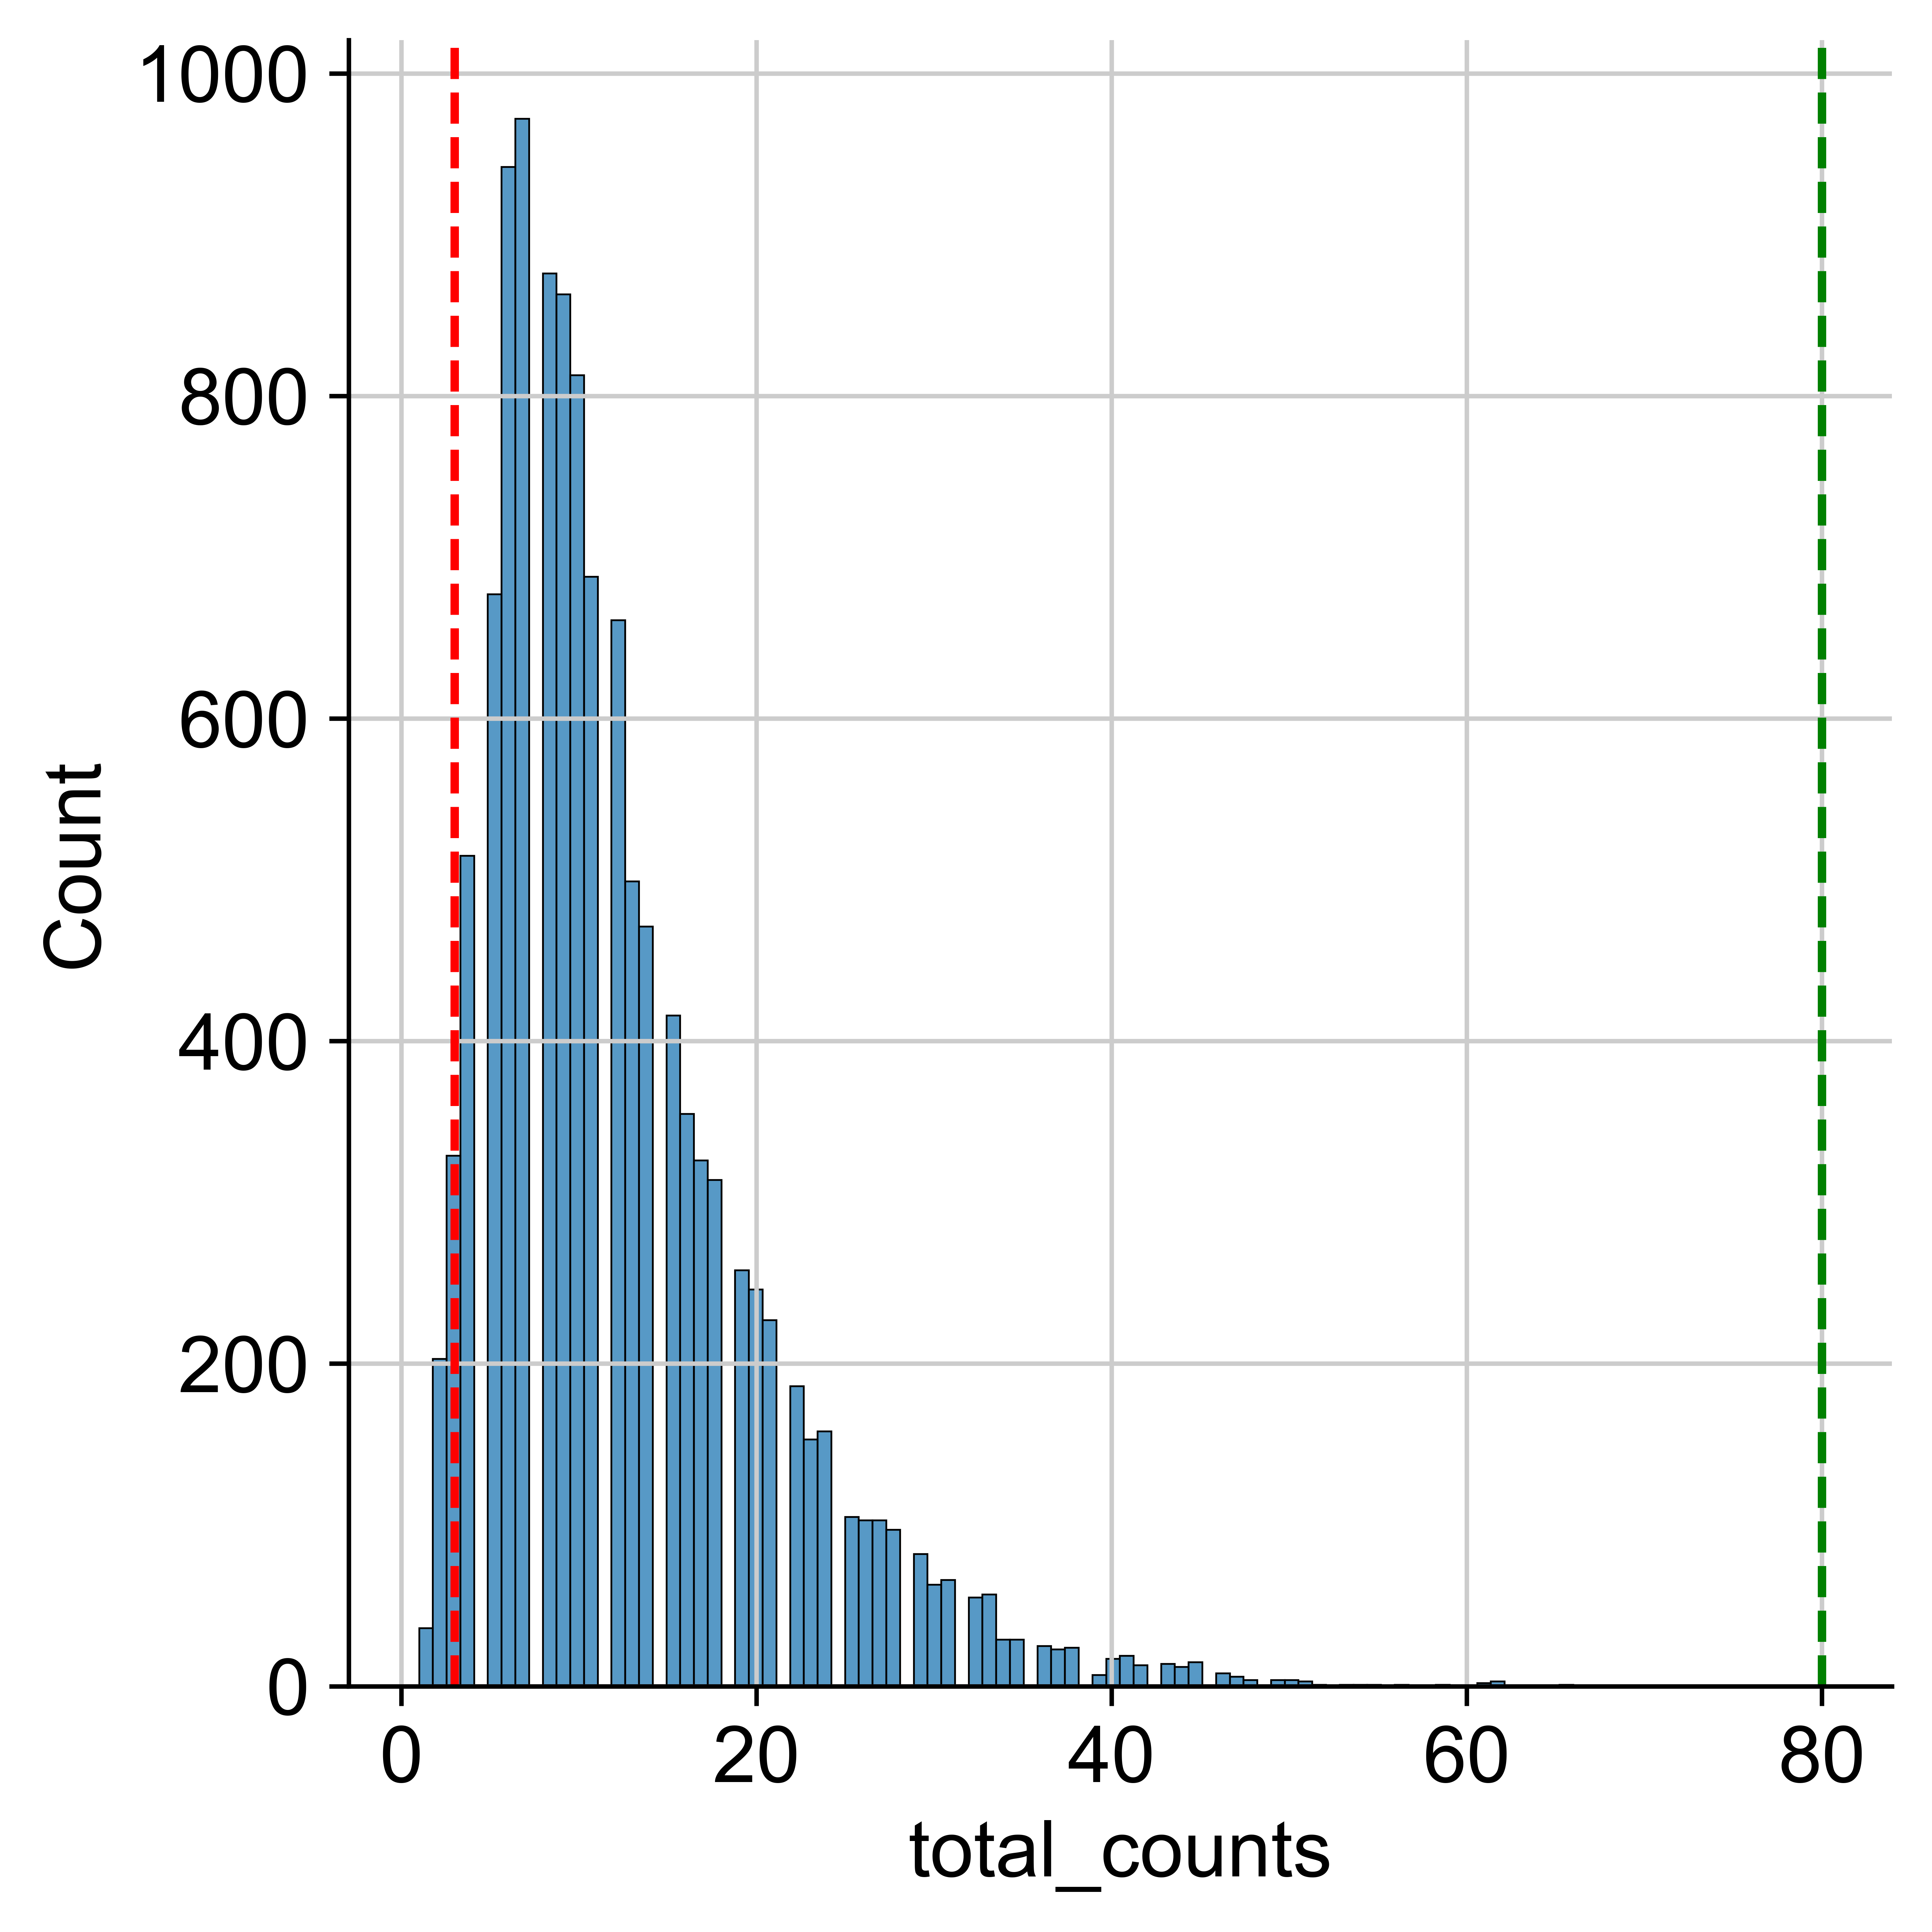

In [53]:
maximum_numbers_of_reads=80
minimum_number_of_reads=3
import seaborn as sns
adata.obs['total_counts']=list(np.sum(exp.transpose().loc[:,:],axis=1))
sns.displot(adata.obs,x='total_counts')
plt.axvline(x=maximum_numbers_of_reads,color='green',linestyle='--')
plt.axvline(x=minimum_number_of_reads,color='red',linestyle='--')
adata=adata[adata.obs['total_counts']>minimum_number_of_reads] #adjust the numbers to keep good cells according to appropiate ones
adata=adata[adata.obs['total_counts']<maximum_numbers_of_reads] #adjust the numbers to more than

In [54]:
sc.pp.filter_cells(adata,min_genes=3)

Trying to set attribute `.obs` of view, copying.
C:\Users\sergio.salas\Miniconda3\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [55]:
adata

AnnData object with n_obs × n_vars = 9338 × 161
    obs: 'cell', 'x', 'y', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'total_counts', 'n_genes'

In [56]:
adata.raw=adata
sc.pp.normalize_total(adata, target_sum=100)
sc.pp.log1p(adata)

In [57]:
sc.tl.pca(adata, svd_solver='arpack')
plt.rcParams['figure.facecolor'] = 'white'
sc.pl.pca_variance_ratio(adata, log=True)

In [58]:
sc.pp.neighbors(adata, n_neighbors=12, n_pcs=20)

In [67]:
sc.tl.leiden(adata,resolution=0.3)

In [66]:
sc.tl.umap(adata,min_dist=0.1)

In [68]:
plt.rcParams['figure.facecolor'] = 'white'
sc.set_figure_params(figsize=(14,10),dpi=600)
sc.pl.umap(adata,color=['leiden'],cmap='hsv',s=30)#,'total_counts'])#,save='chickbrain_UMAP_bins.pdf')

In [69]:
def map_of_clusters(adata,key='leiden',clusters='all',size=8,background='white',figuresize=(10,7),save=None,format='pdf'):
    
    #PARAMETERS TO MODIFY:
    #-key: the terms in adata.obs that you want to plot
    #-clusters:'all' for plotting all clusters in a single plot, 'individual': for plots of individual genes, or ['3','5'] (your groups
    #          between square brackets to plot only some clusters
    #-size: to change the size of your spots
    #-background: to change the color of the background
    #-figuresize: to specify the size of your figure
    #-save: if you want to save your figure, give the PATH of the folder where you want to save it
    #-format: specify the format in which you want to save your figure
    
    try:
        adata.obs[key]=adata.obs[key].astype(int)
        colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))
    except:
        colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))
    #cl.apply(lambda x: colors[x])
    plt.rcParams['figure.facecolor'] = background
    if clusters=='all':
        cl=adata.obs[key]
        plt.figure(figsize=figuresize)
        figa=plt.scatter(x=adata.obs.X,y=adata.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
        plt.axis('off')
        if not save==None:
            plt.savefig(save +'/map_all_clusters_'+str(size)+'_'+background+'_'+key+'.'+format)
    elif clusters=='individual':
        cl=adata.obs[key]
        for each in adata.obs[key].unique():
            adatasub=adata[adata.obs[key]==each]
            plt.figure(figsize=figuresize)
            plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)
            cl=adatasub.obs[key]
            plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
            plt.axis('off')
            plt.title('Group: '+ str(each))
            if not save==None:
                plt.savefig(save +'/map_inidivdual_cluster_'+str(each)+'_'+str(size)+background+'_'+key+'.'+format)
    else:
        adatasub=adata[adata.obs[key].isin(clusters)]
        plt.figure(figsize=figuresize)
        plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)
        cl=adatasub.obs[key]
        plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
        plt.axis('off')
        plt.legend()
        if not save==None:
                s=''
                for element in clusters:
                    s=s+str(element)
                print(s)
                plt.savefig(save +'/map_group_of_clusters_'+str(s)+'_'+str(size)+background+'_'+key+'.'+format)
#        plt.title('Group: '+ paste(clusters))

In [64]:
adata.obs['X']=adata.obs['x']
adata.obs['Y']=adata.obs['y']

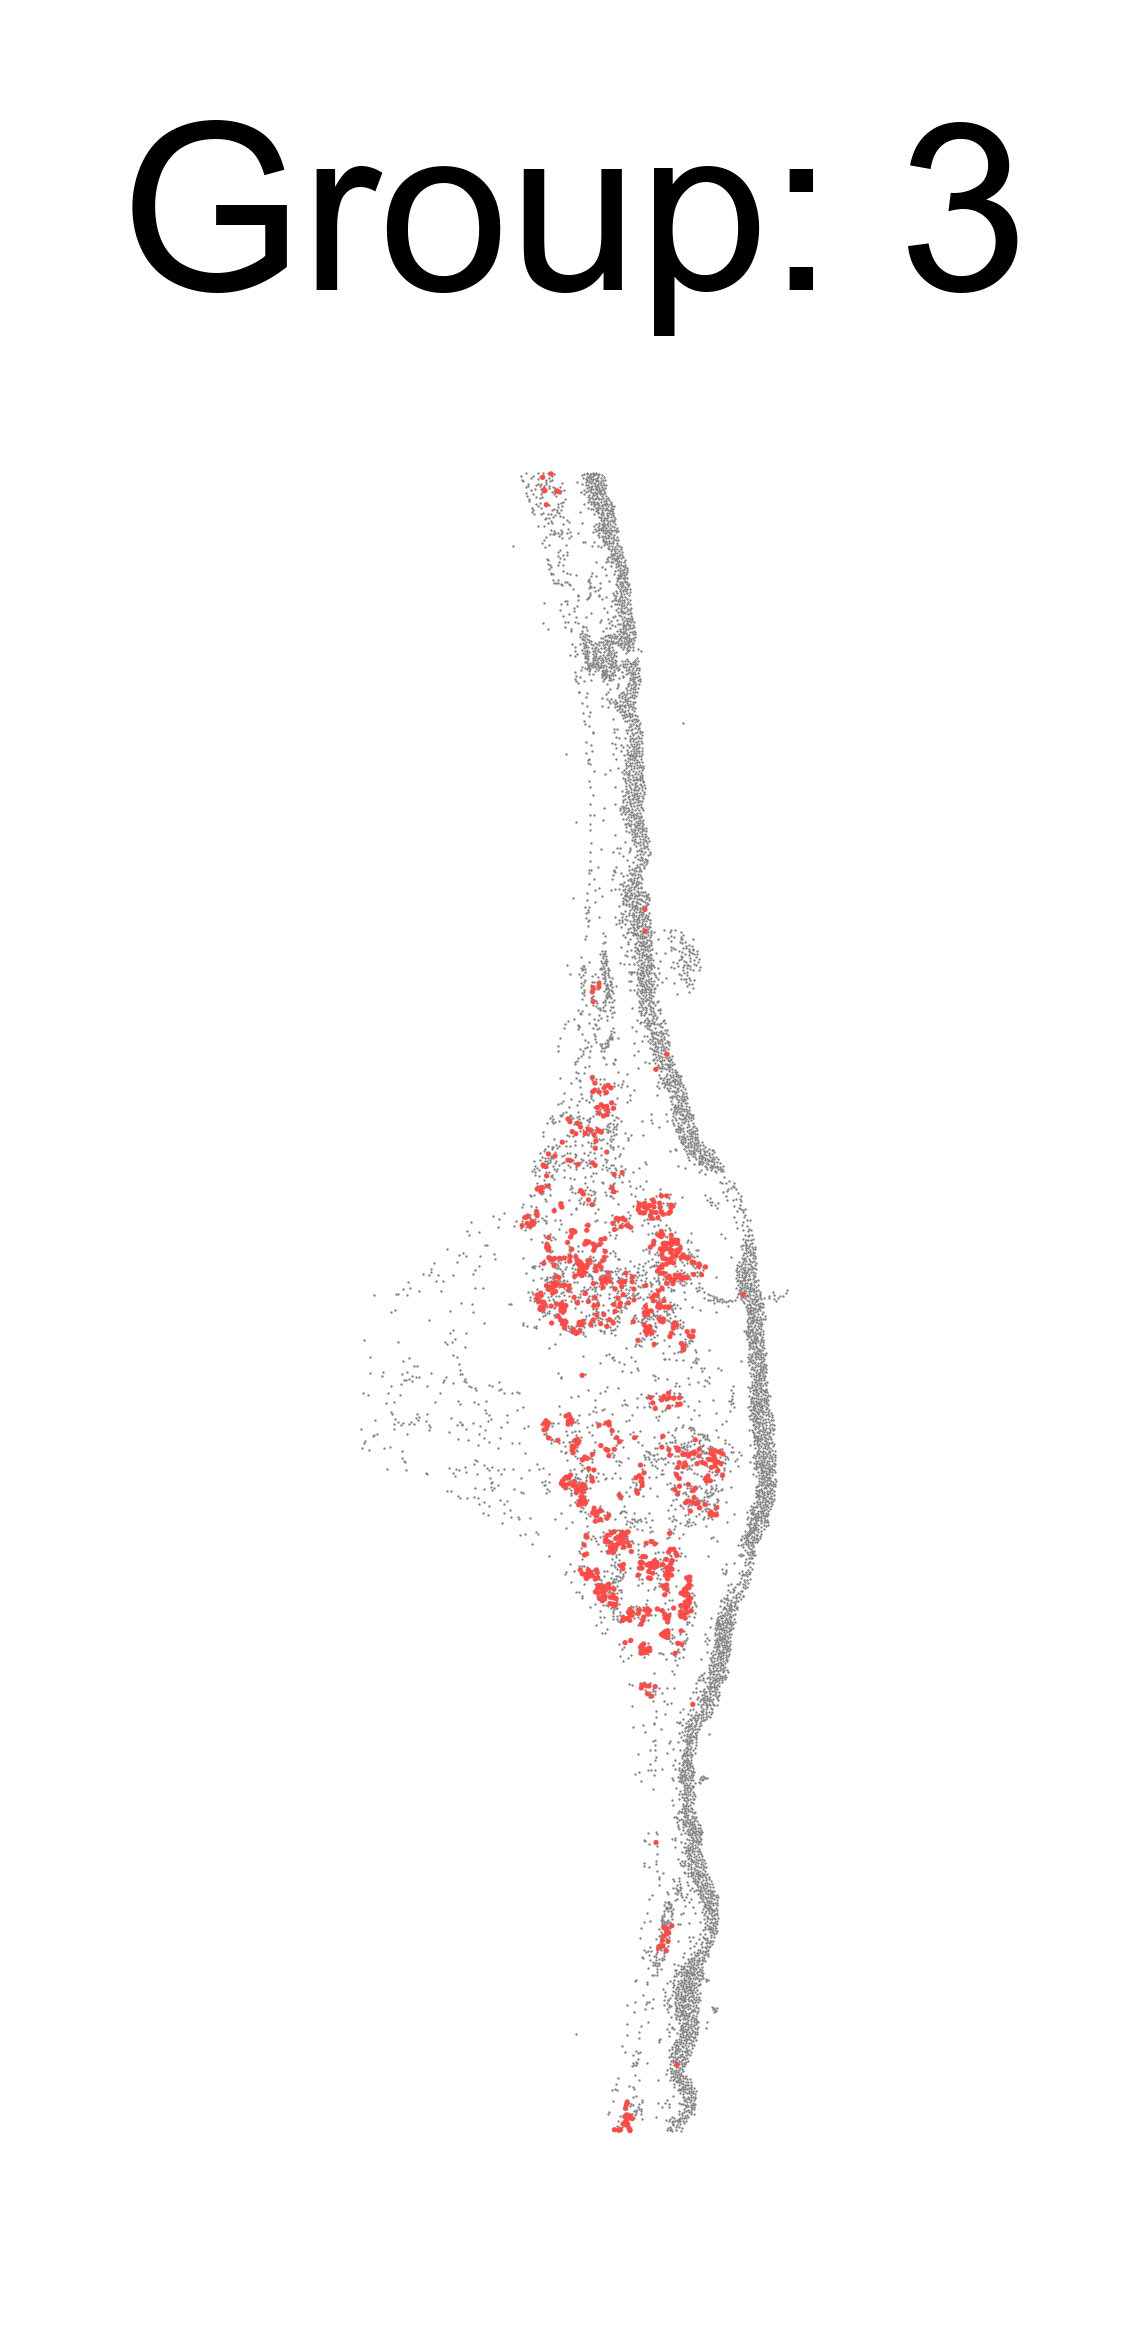

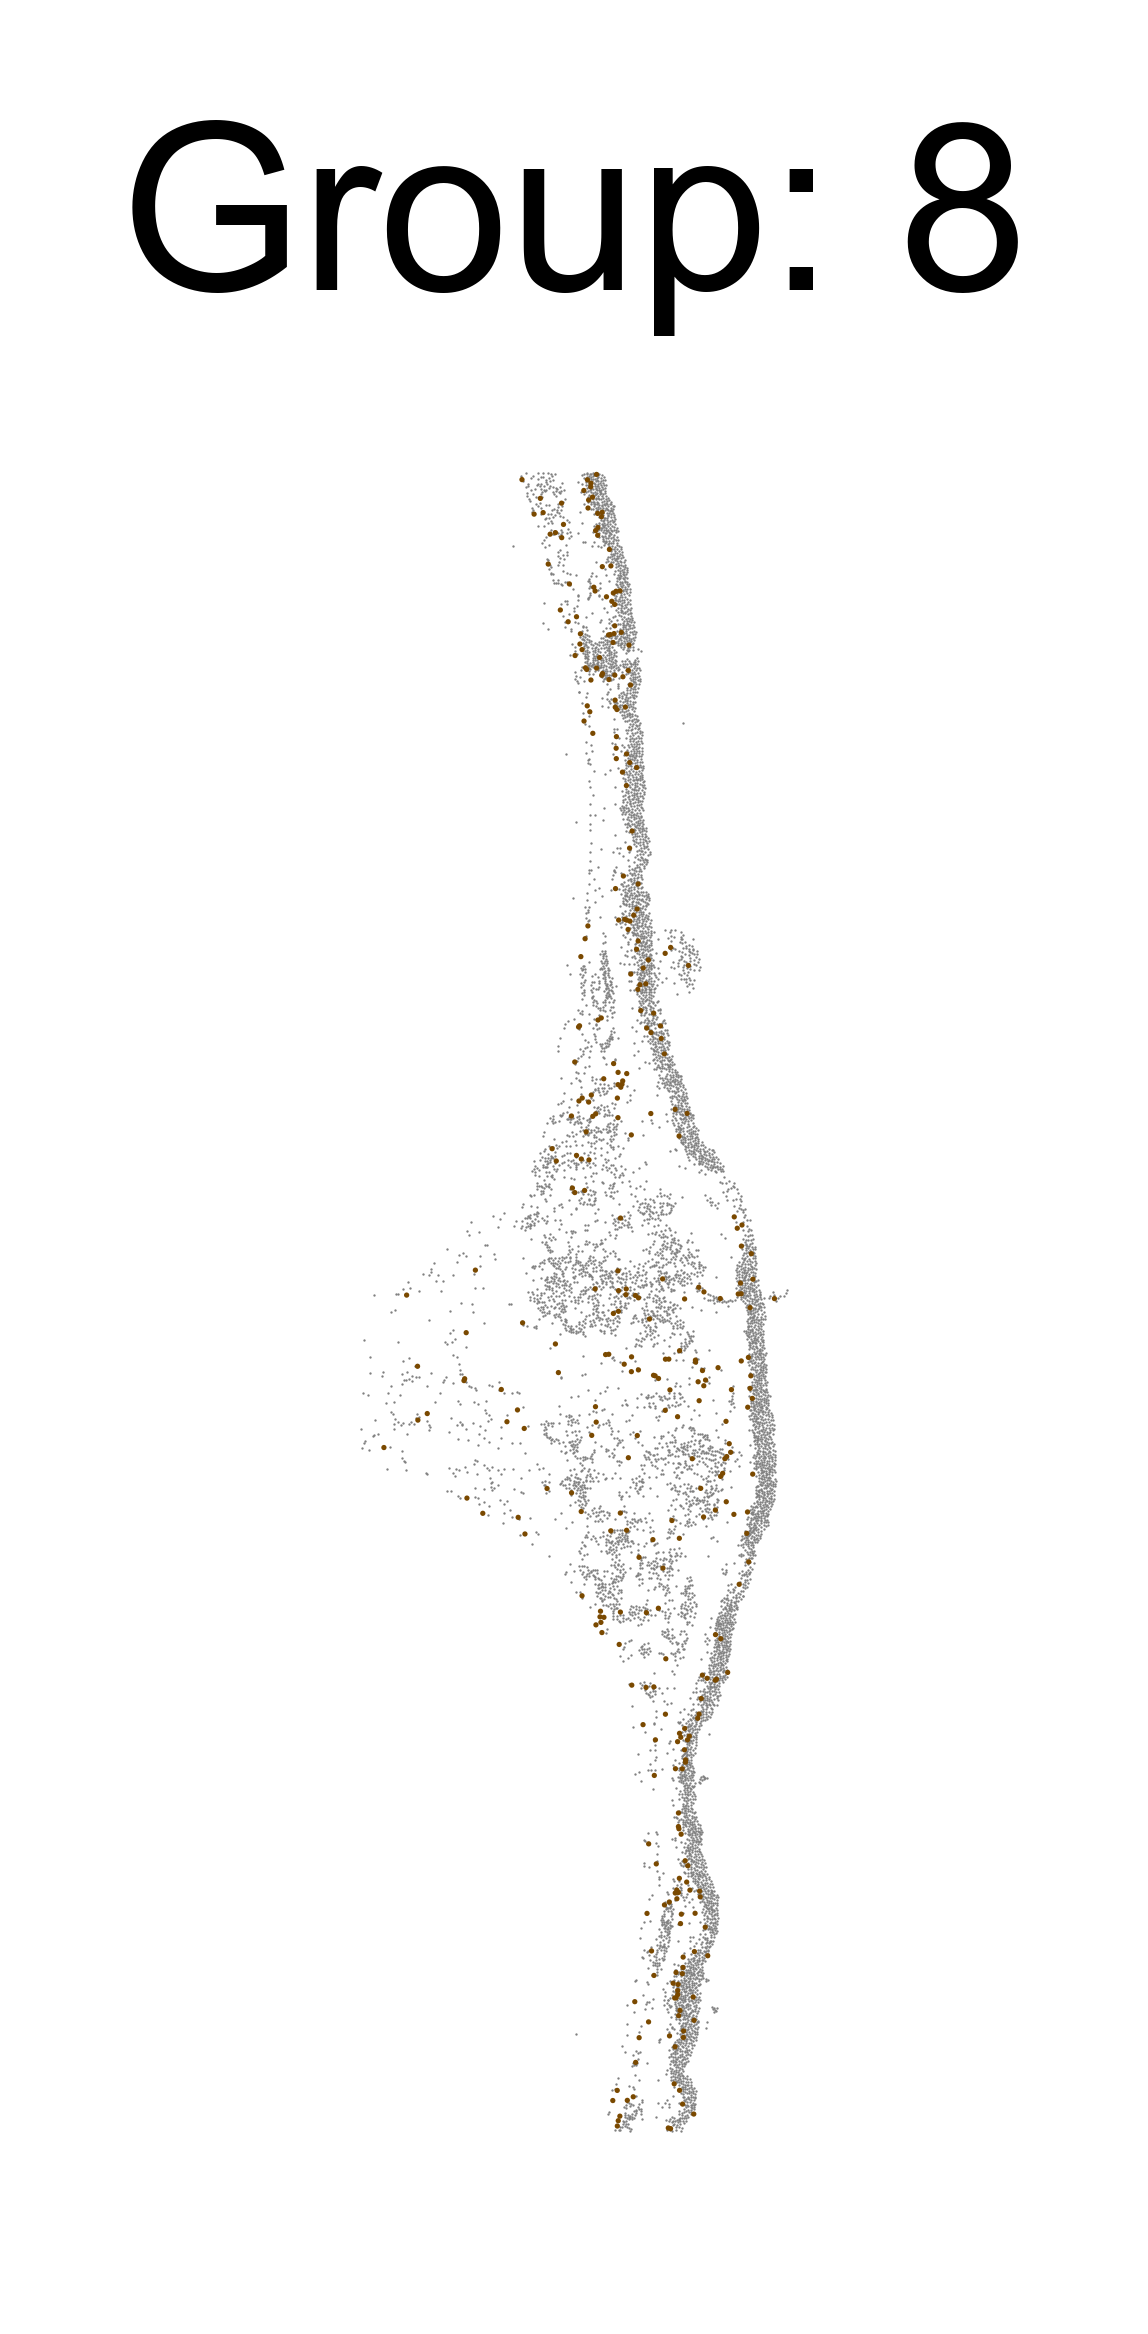

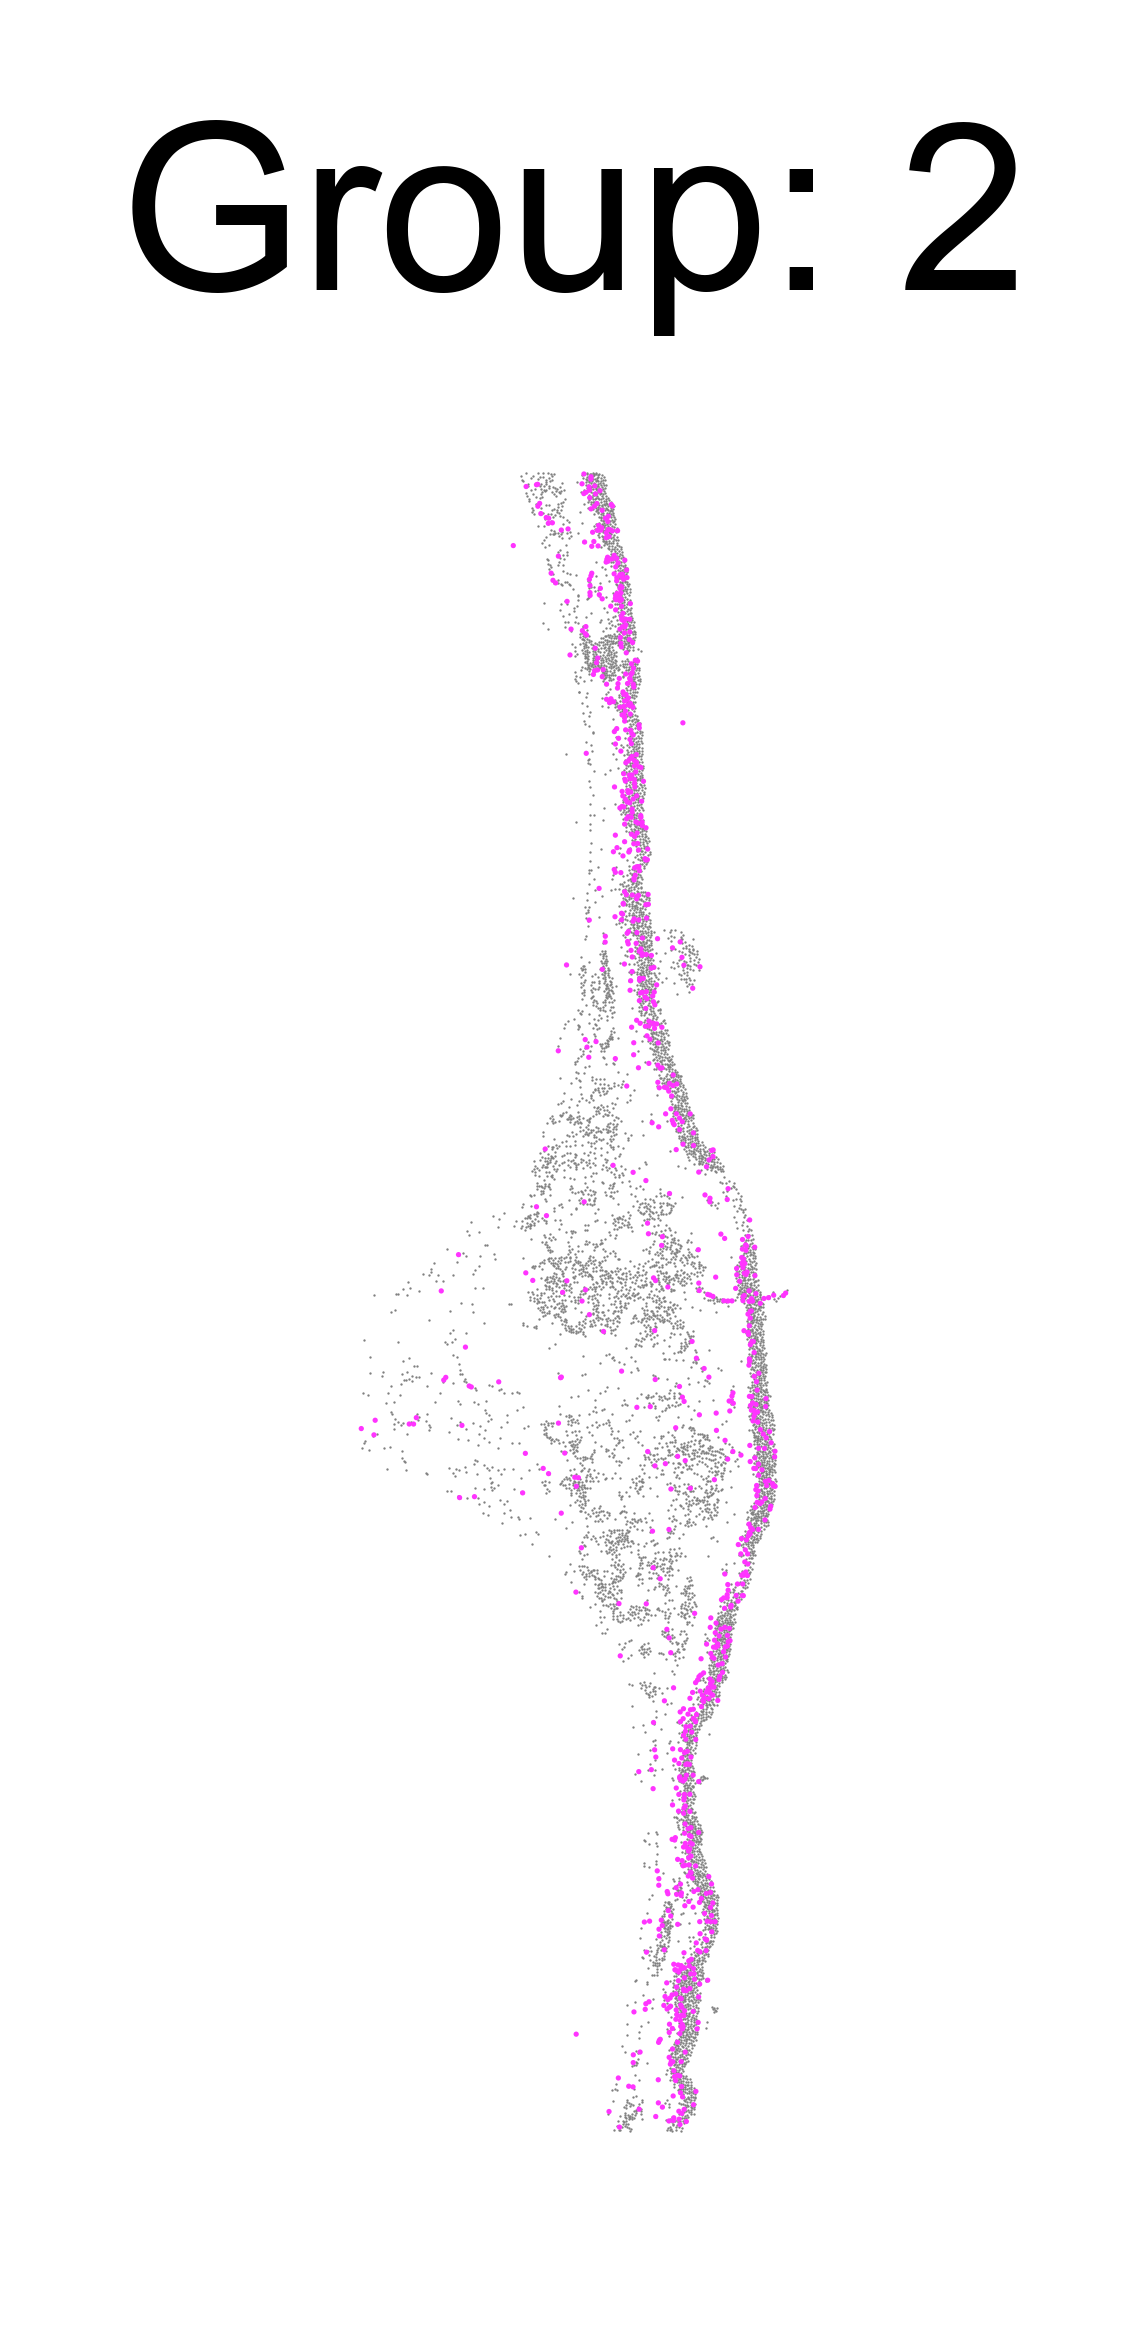

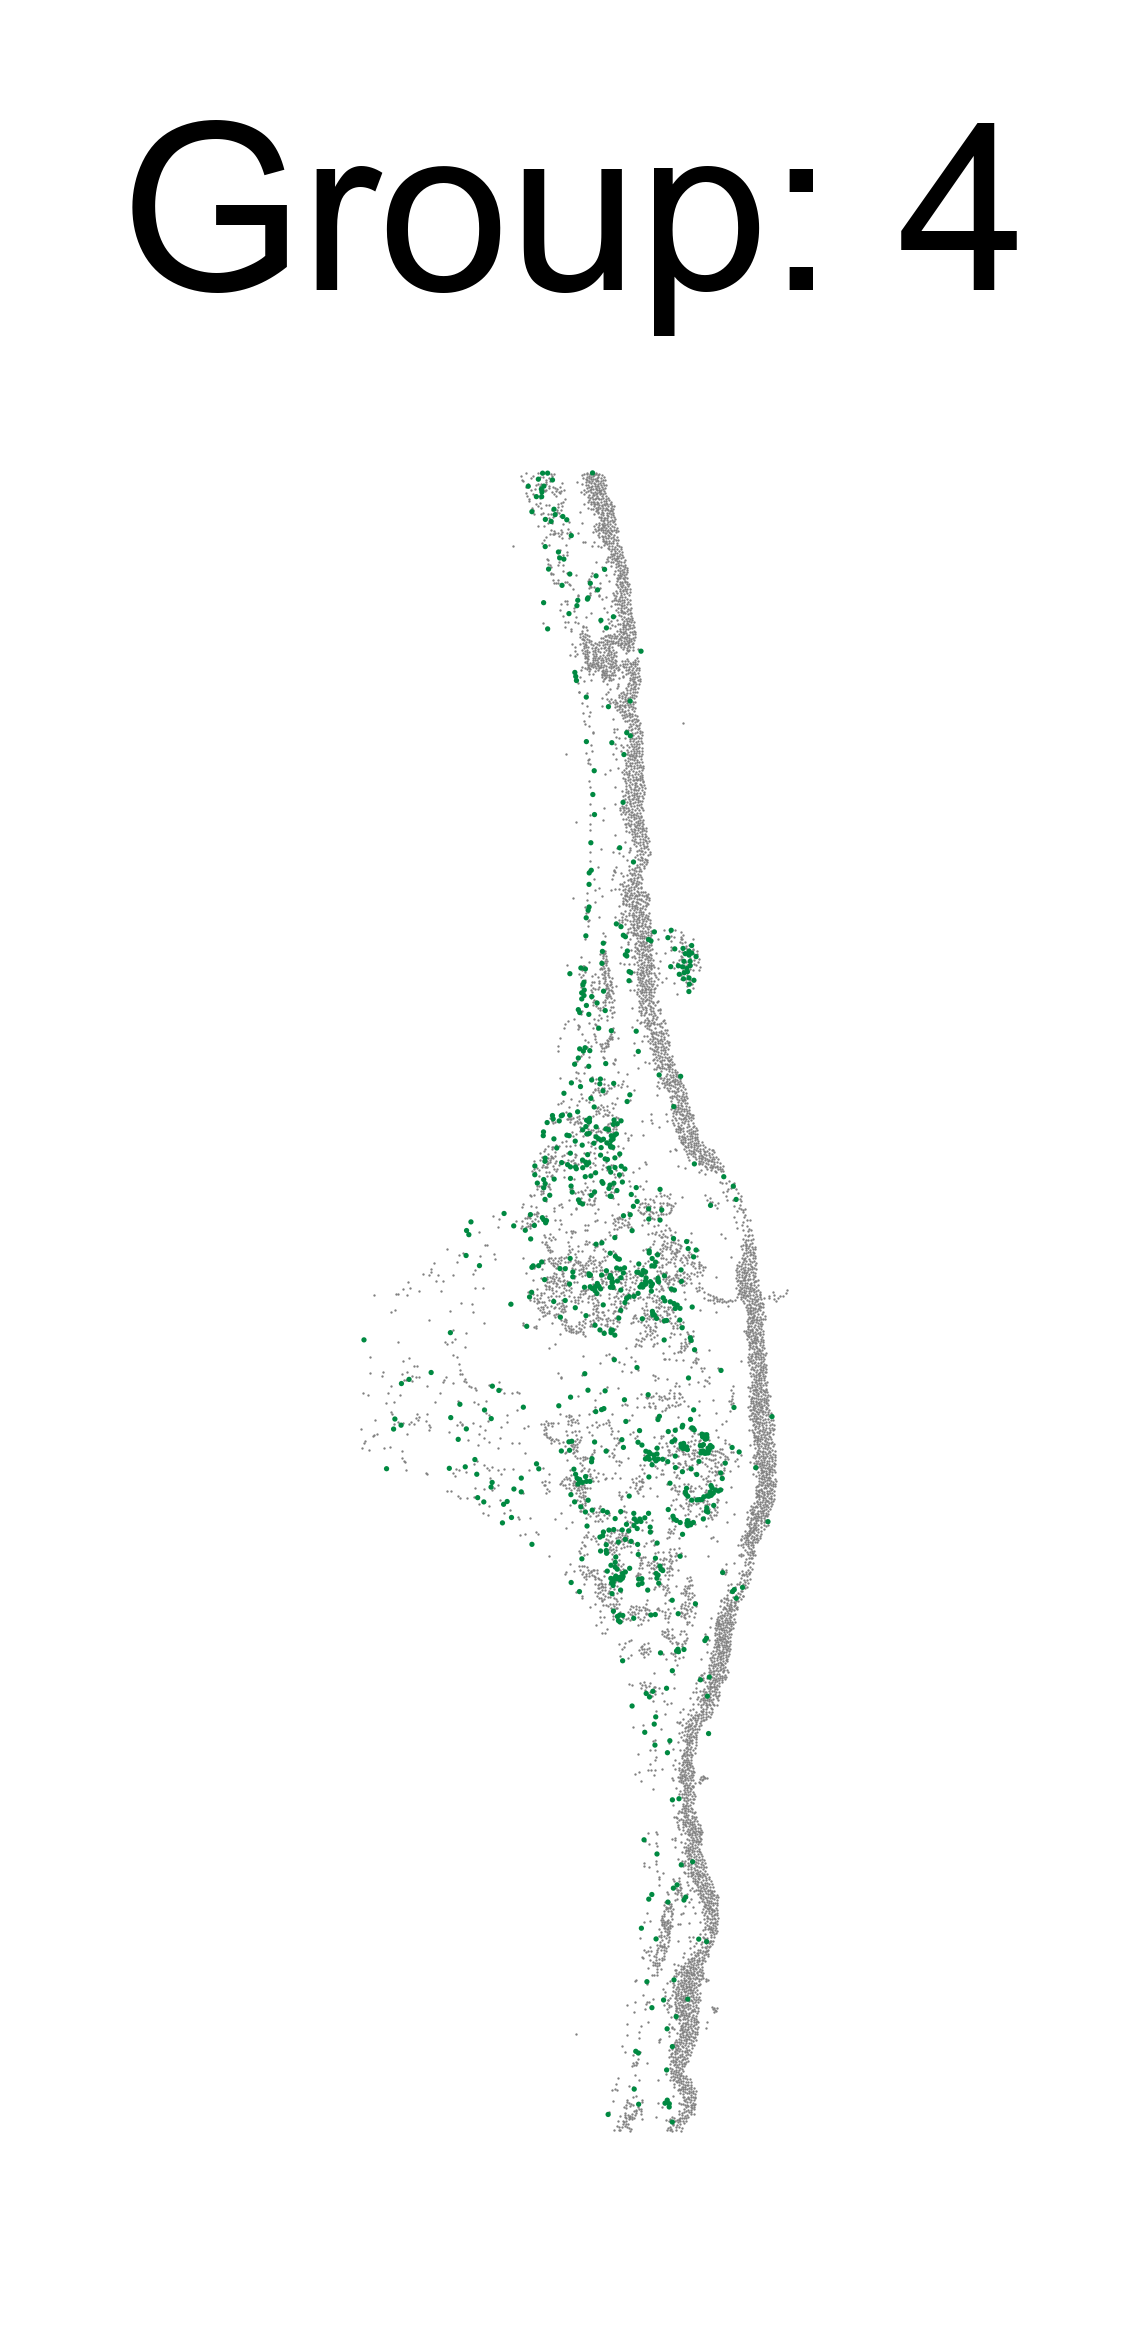

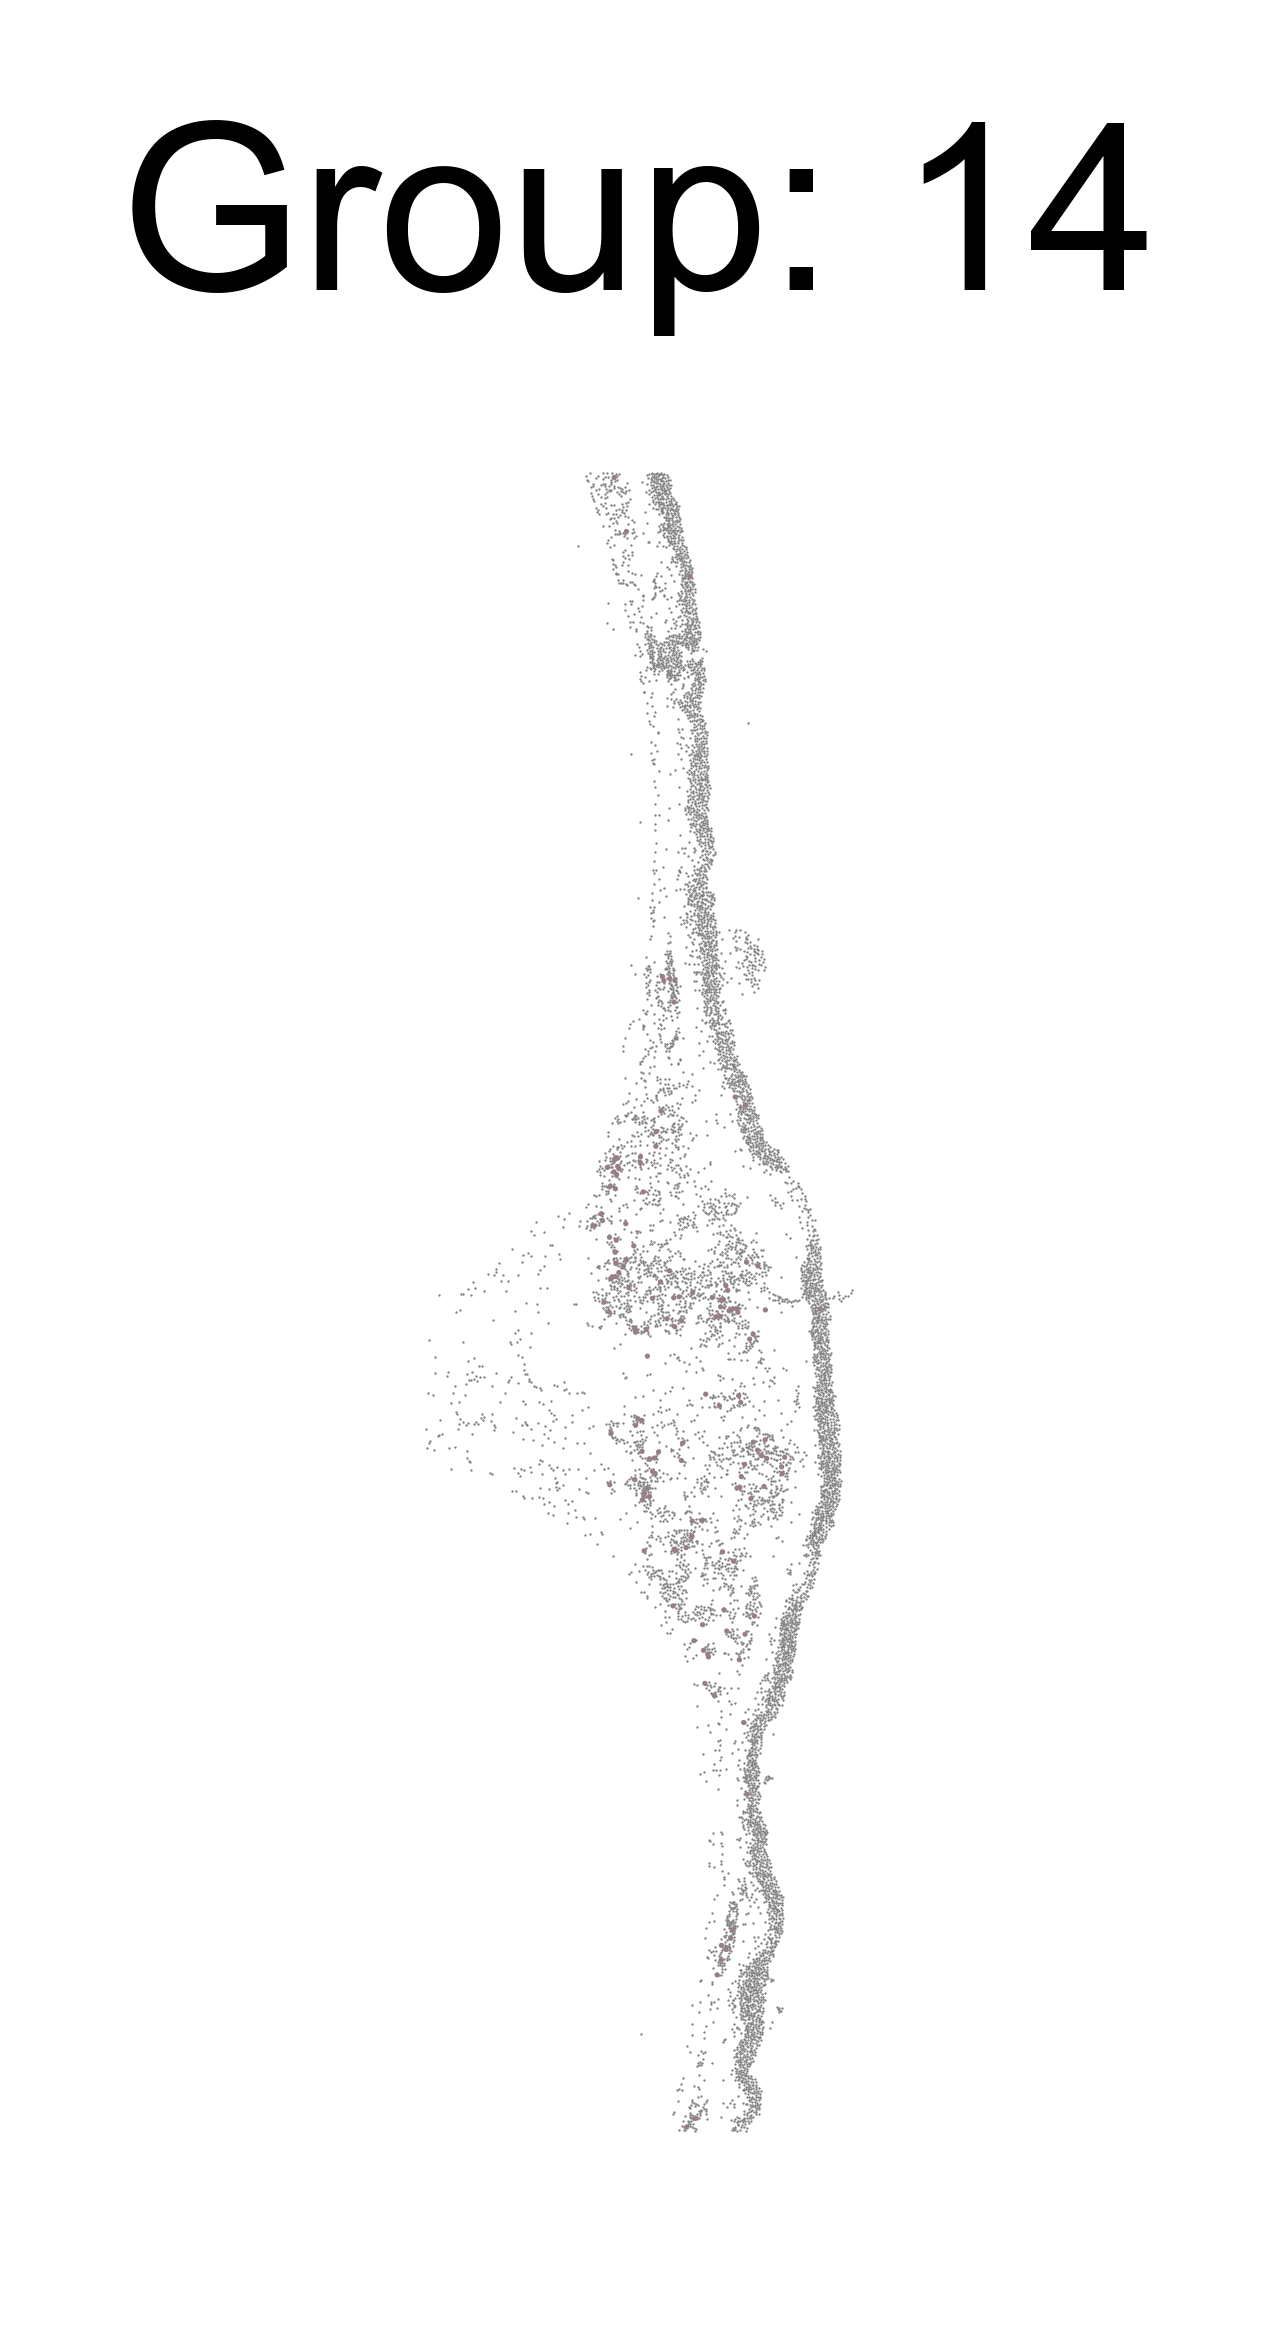

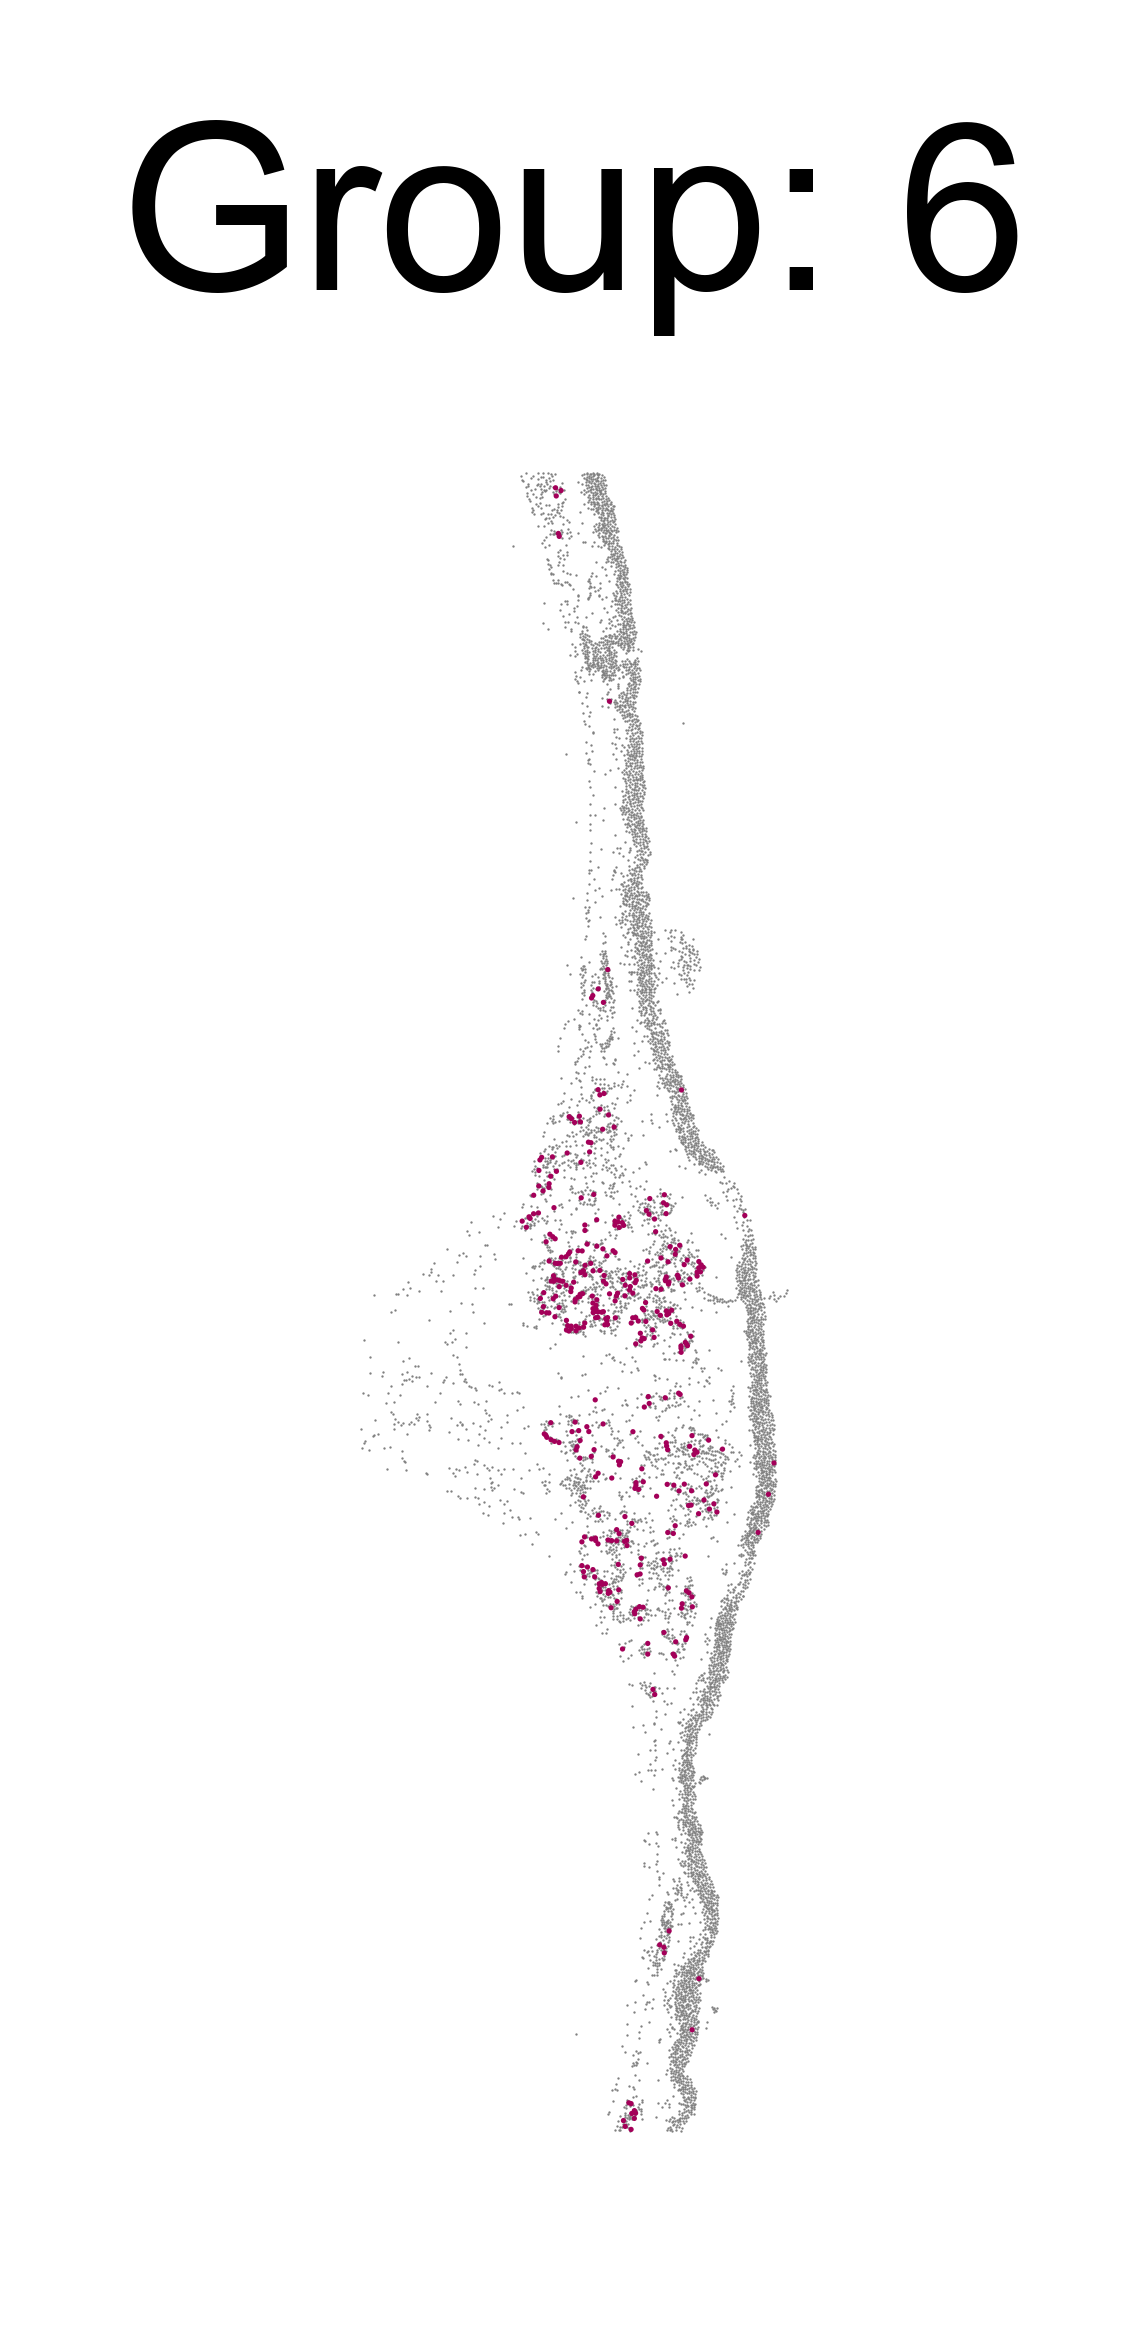

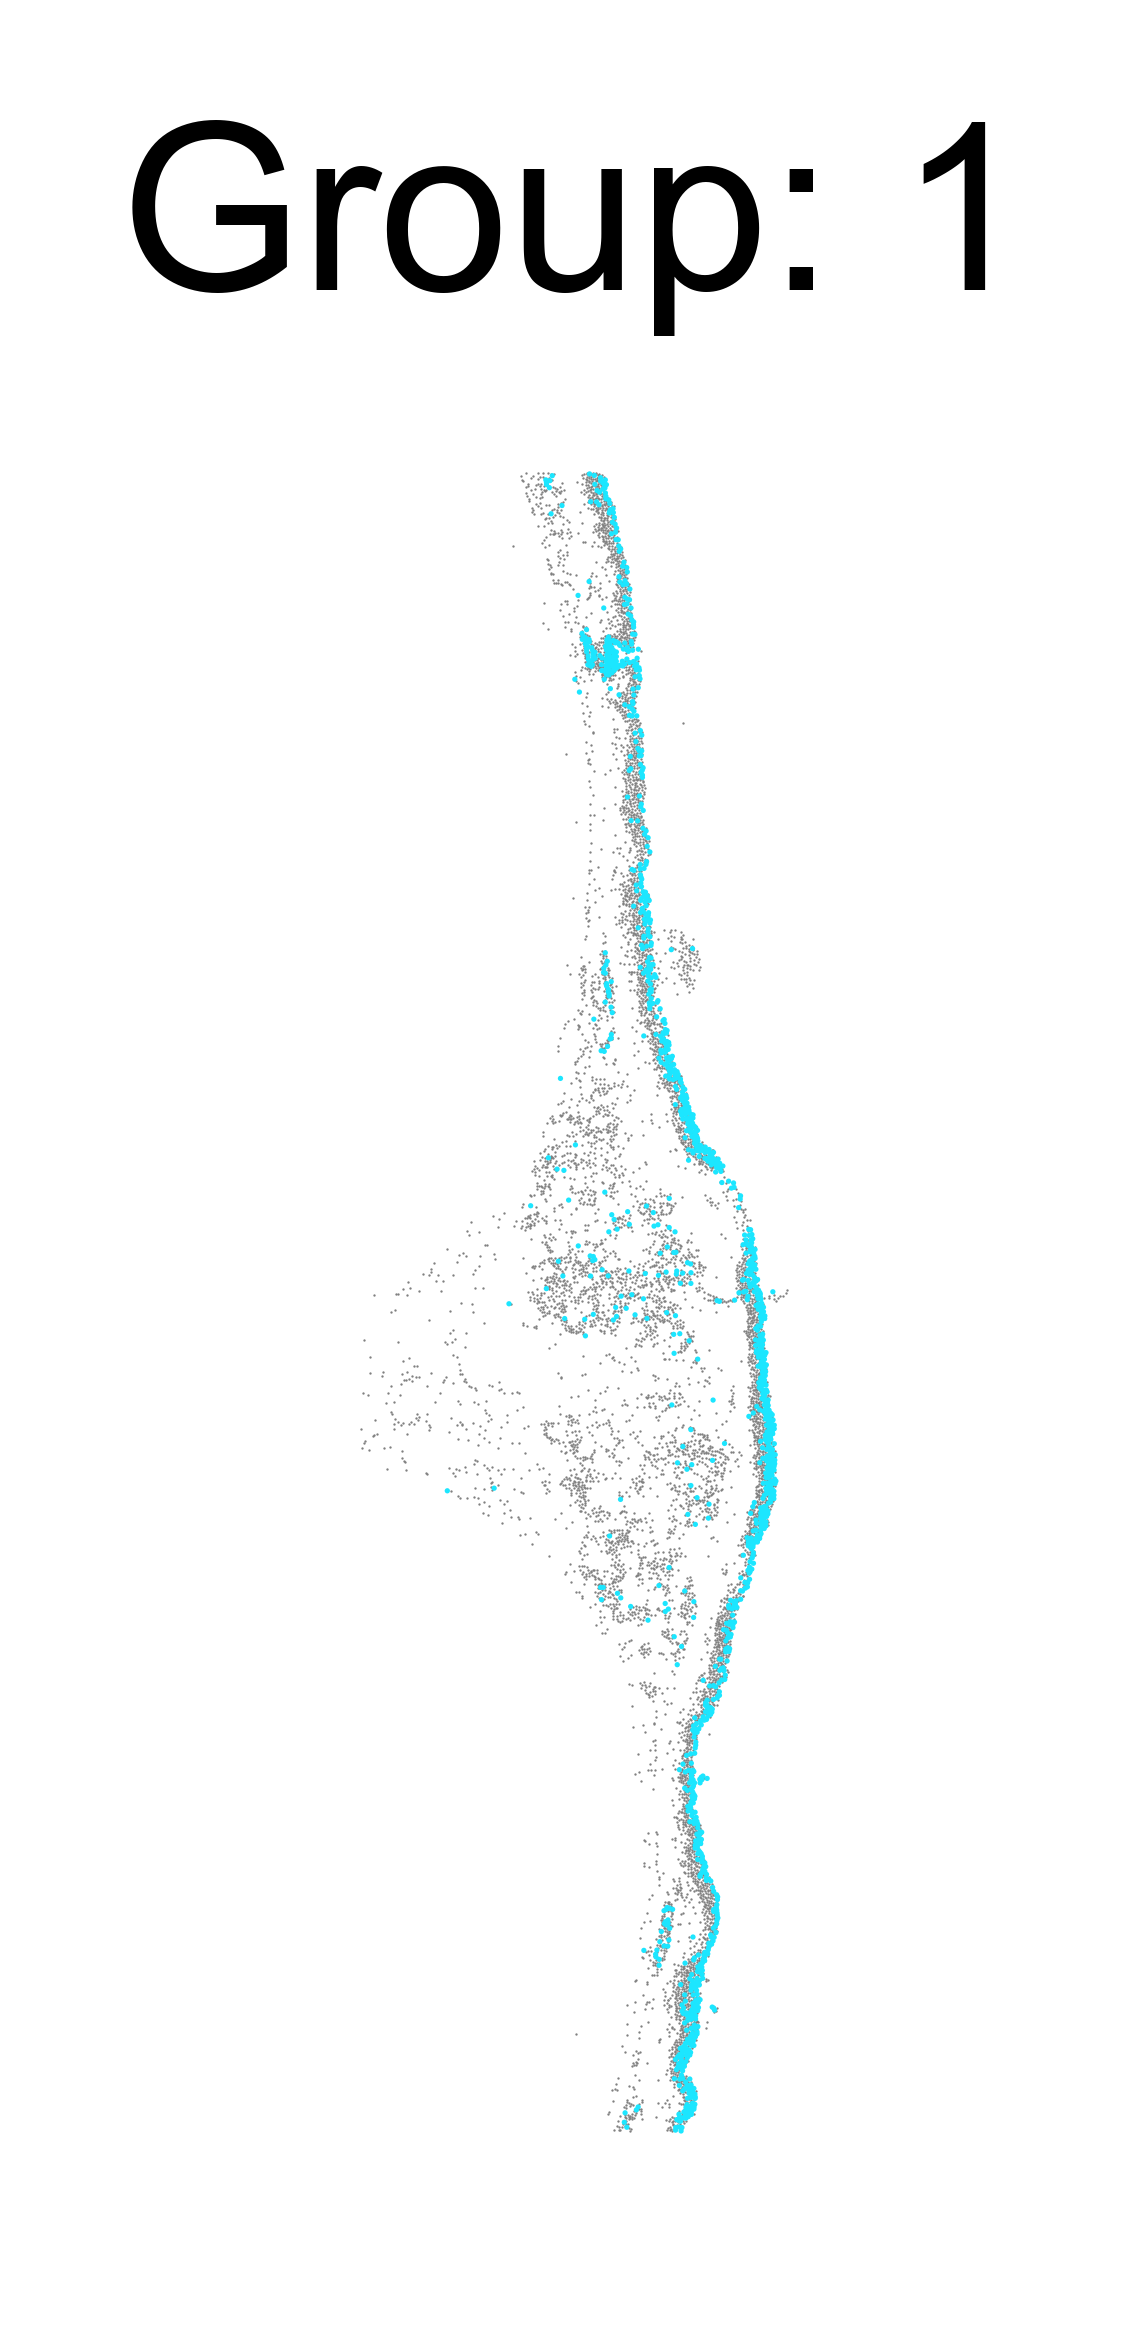

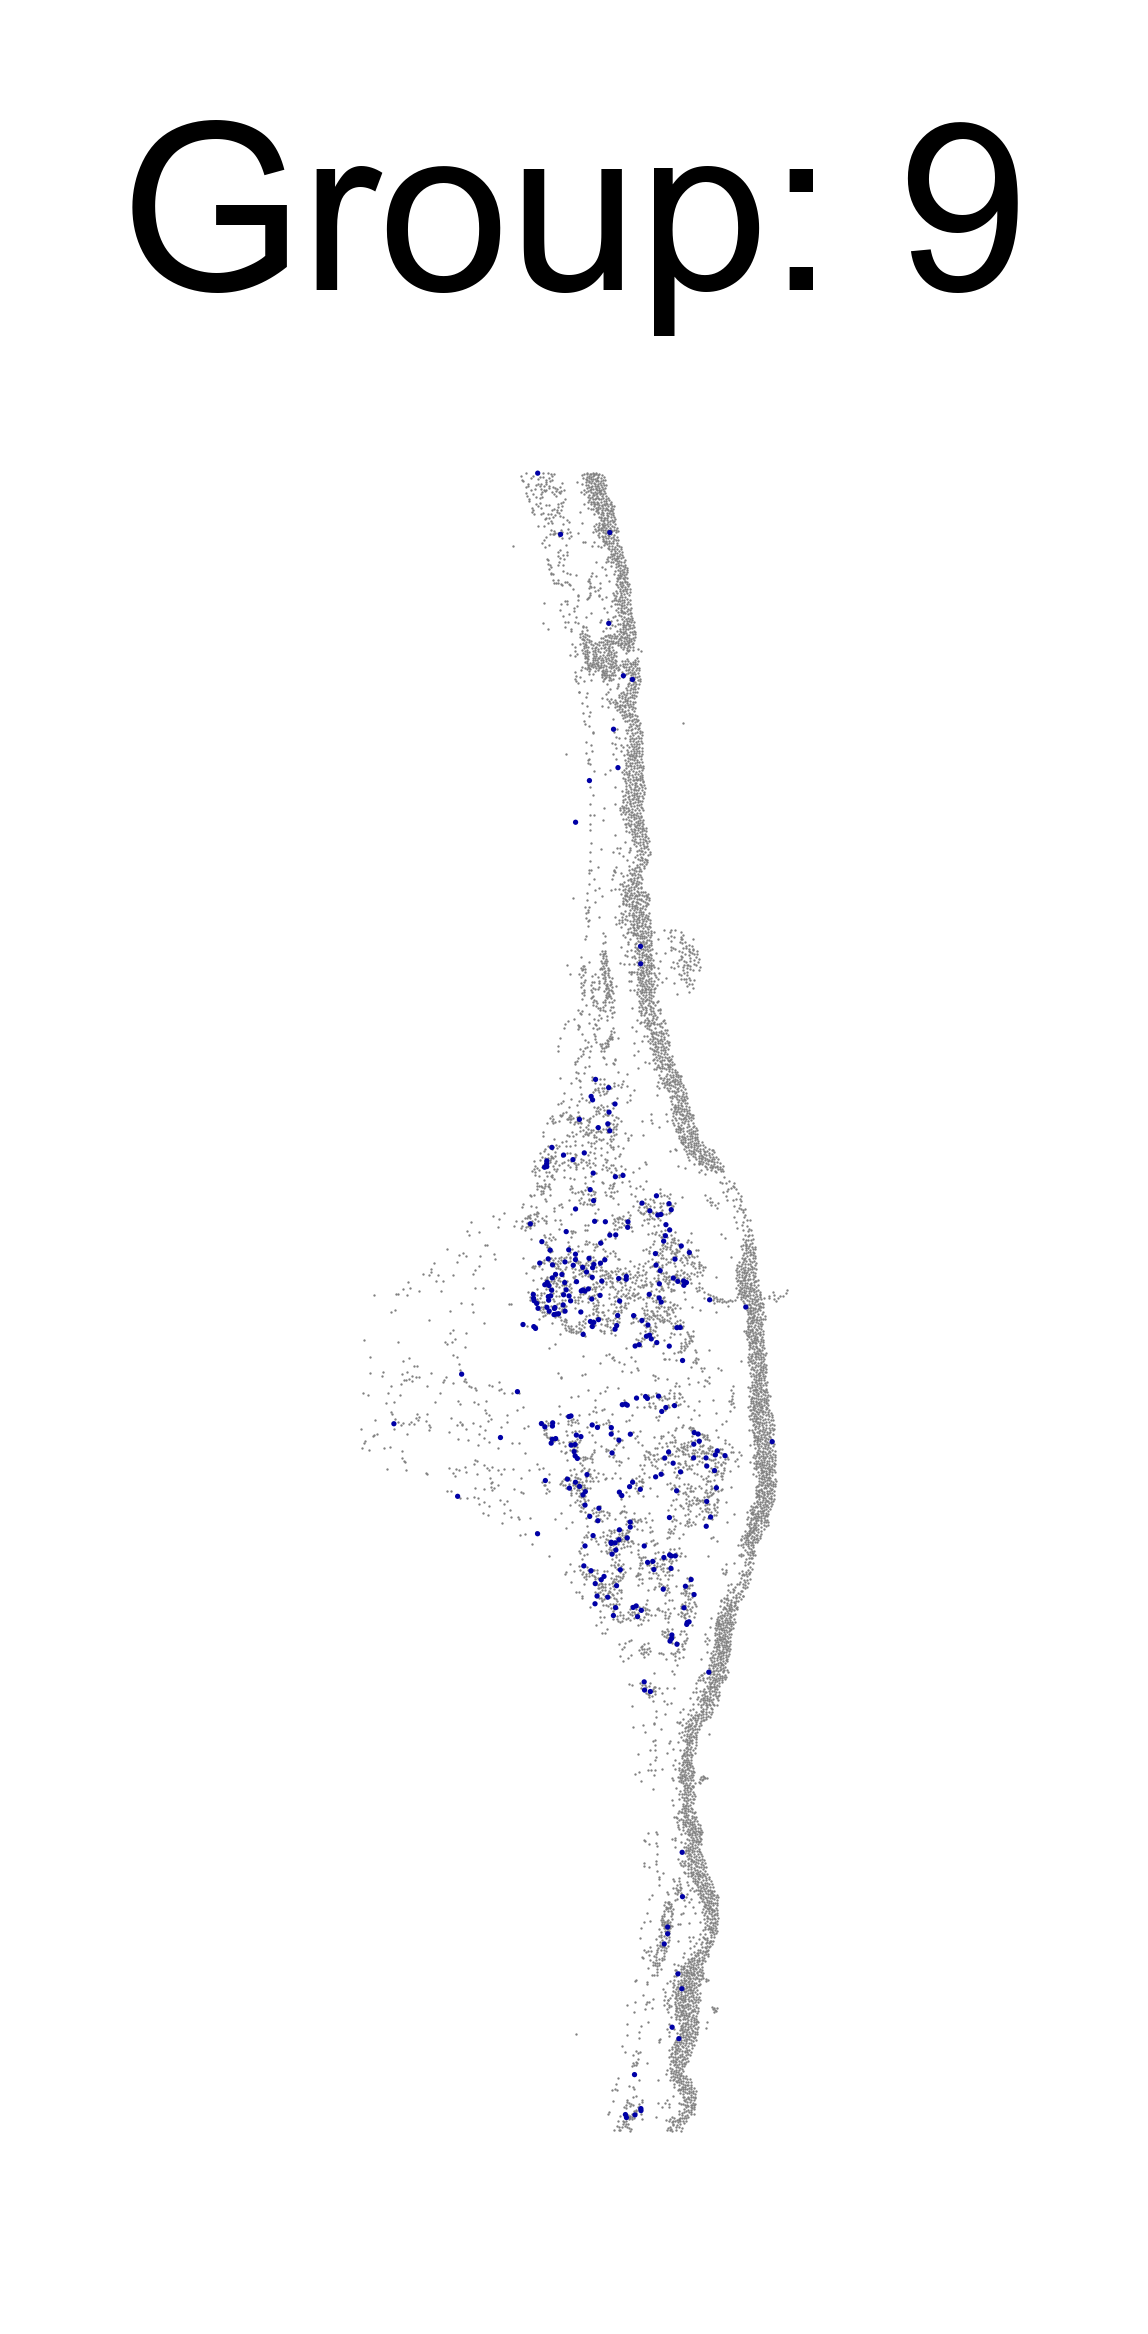

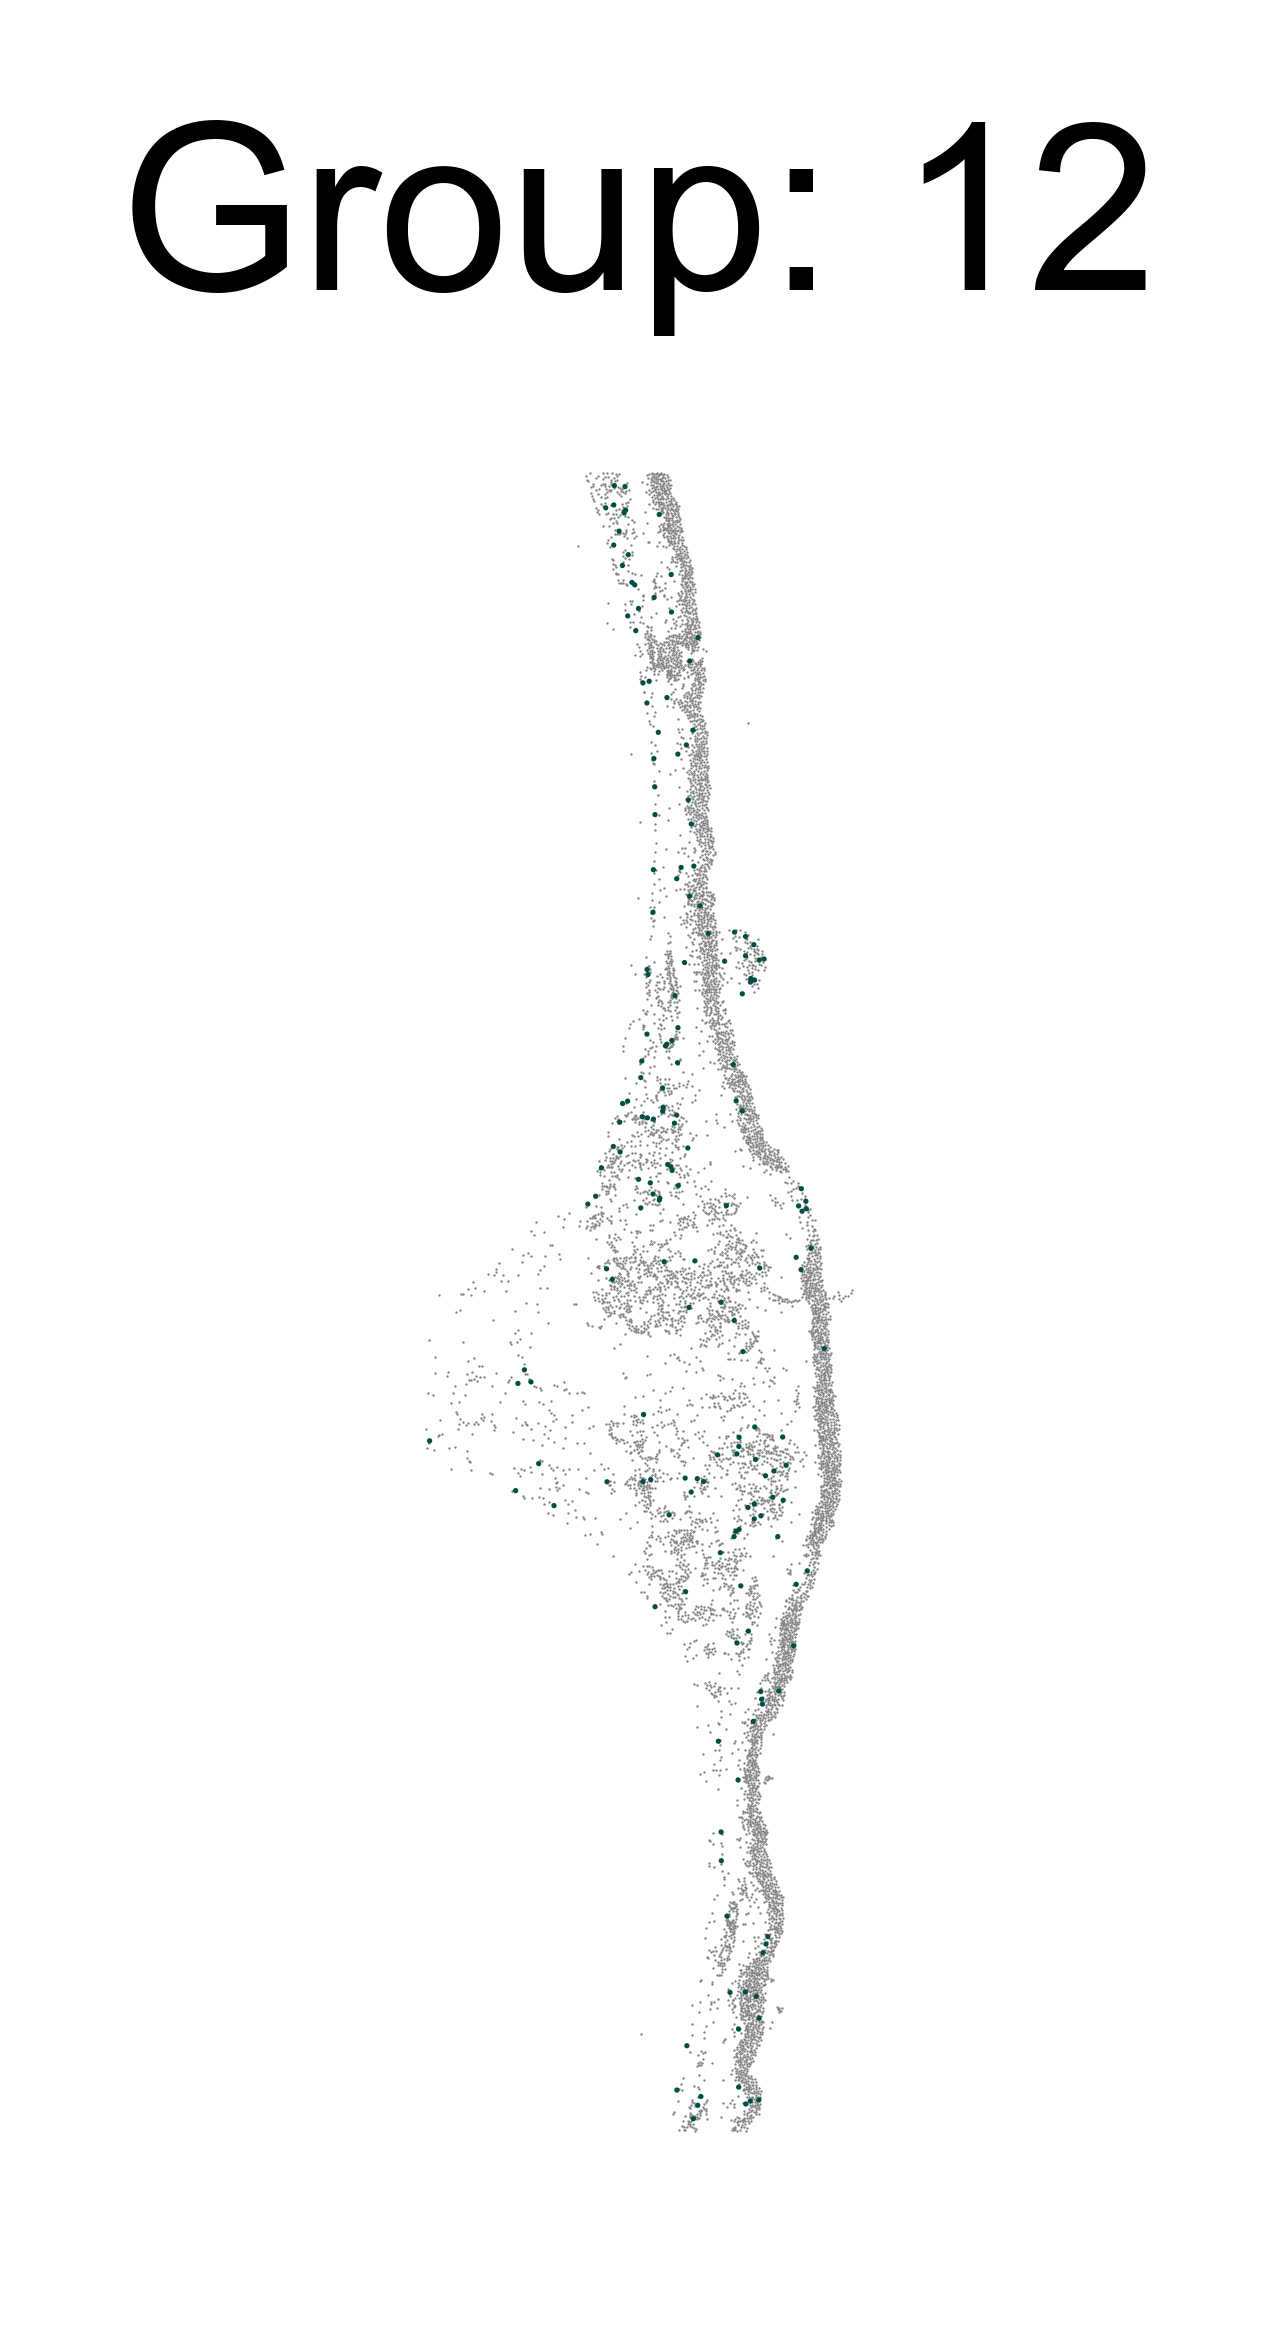

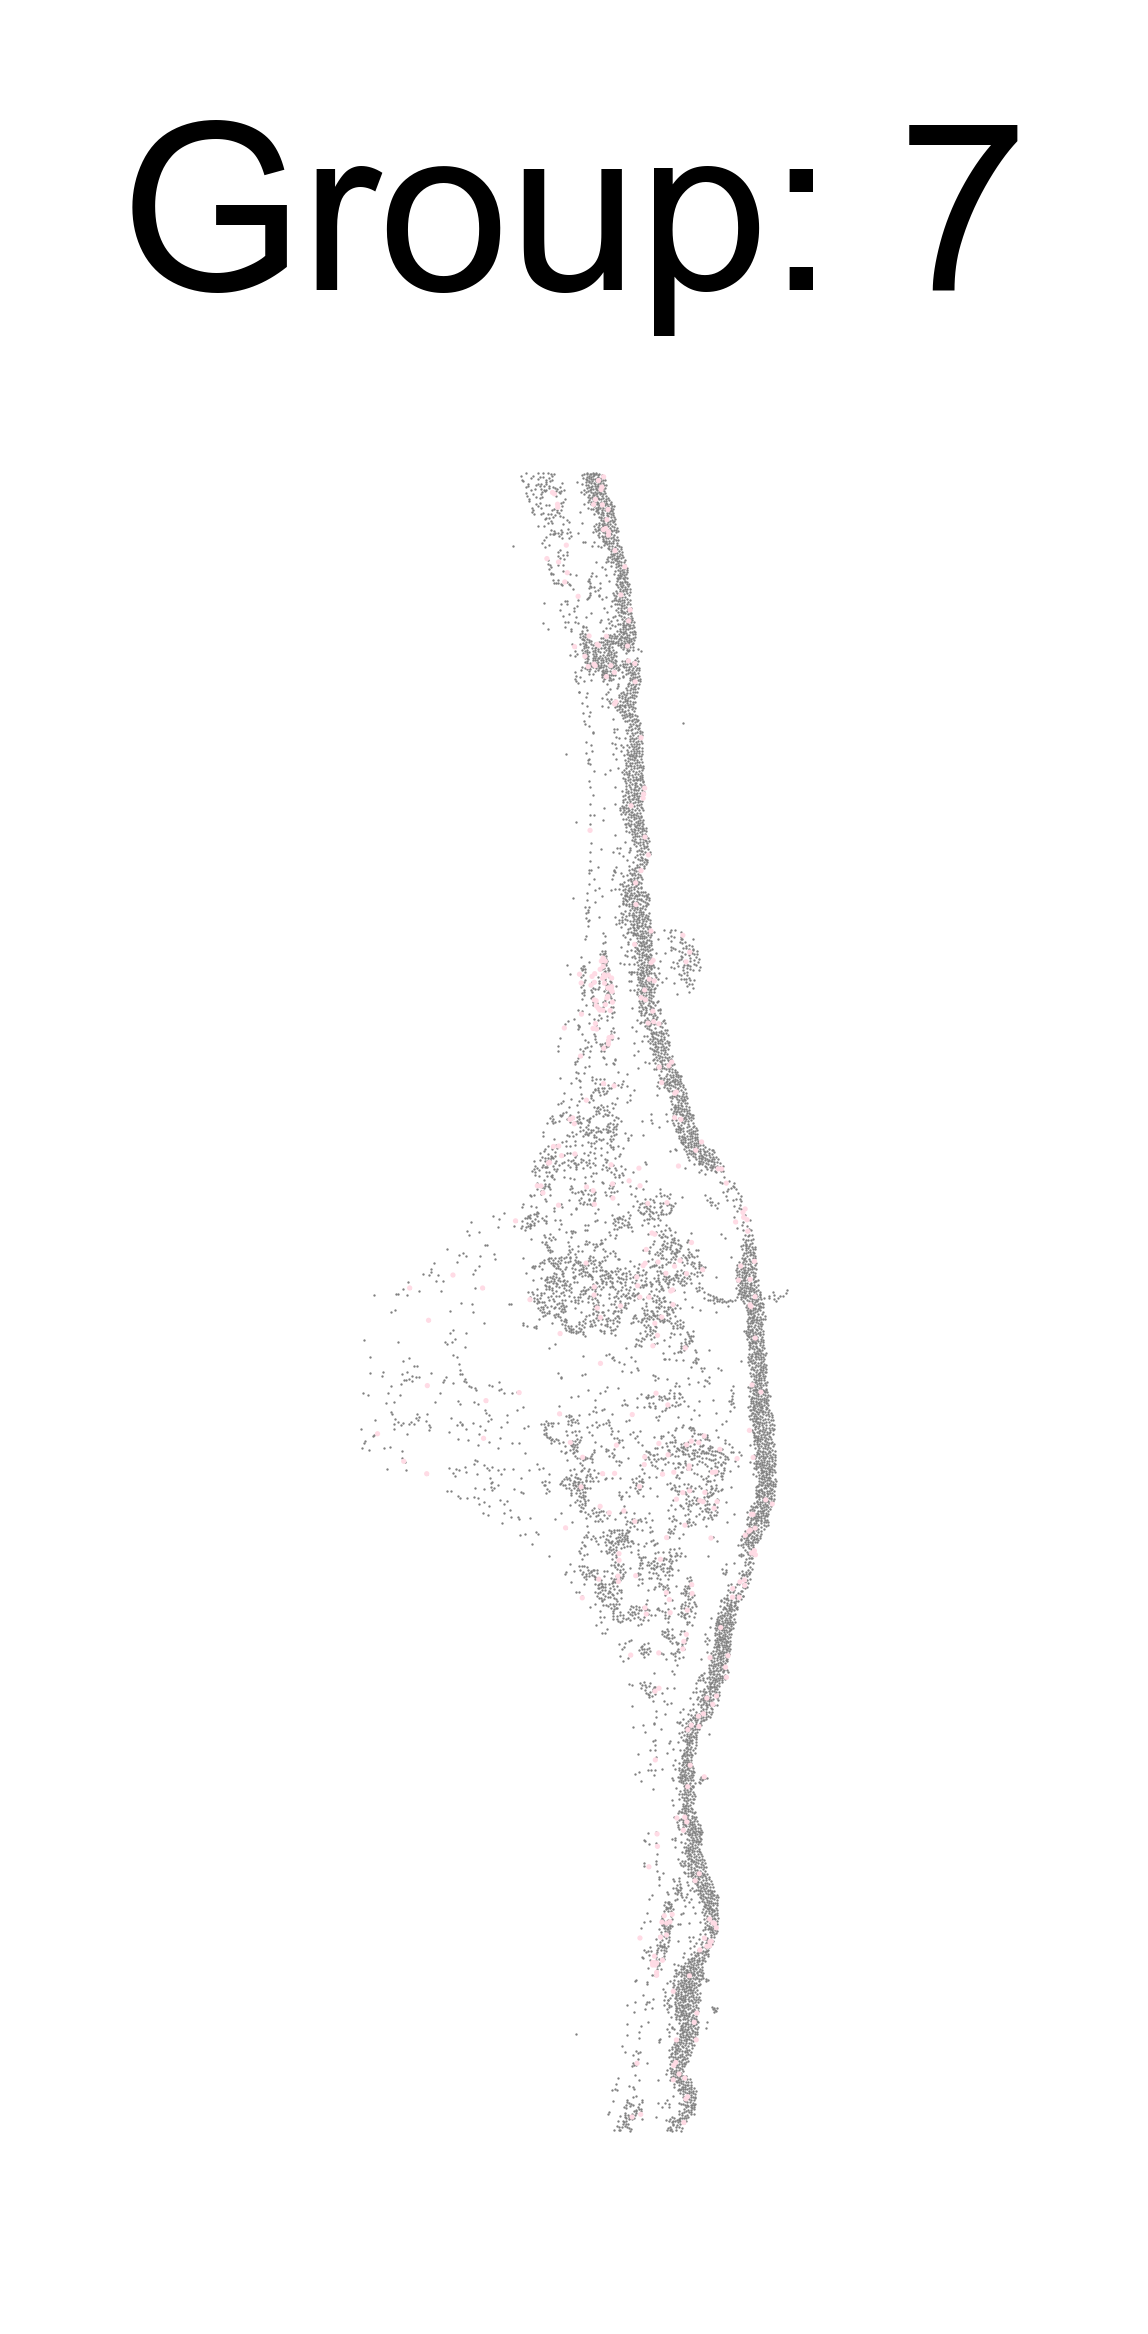

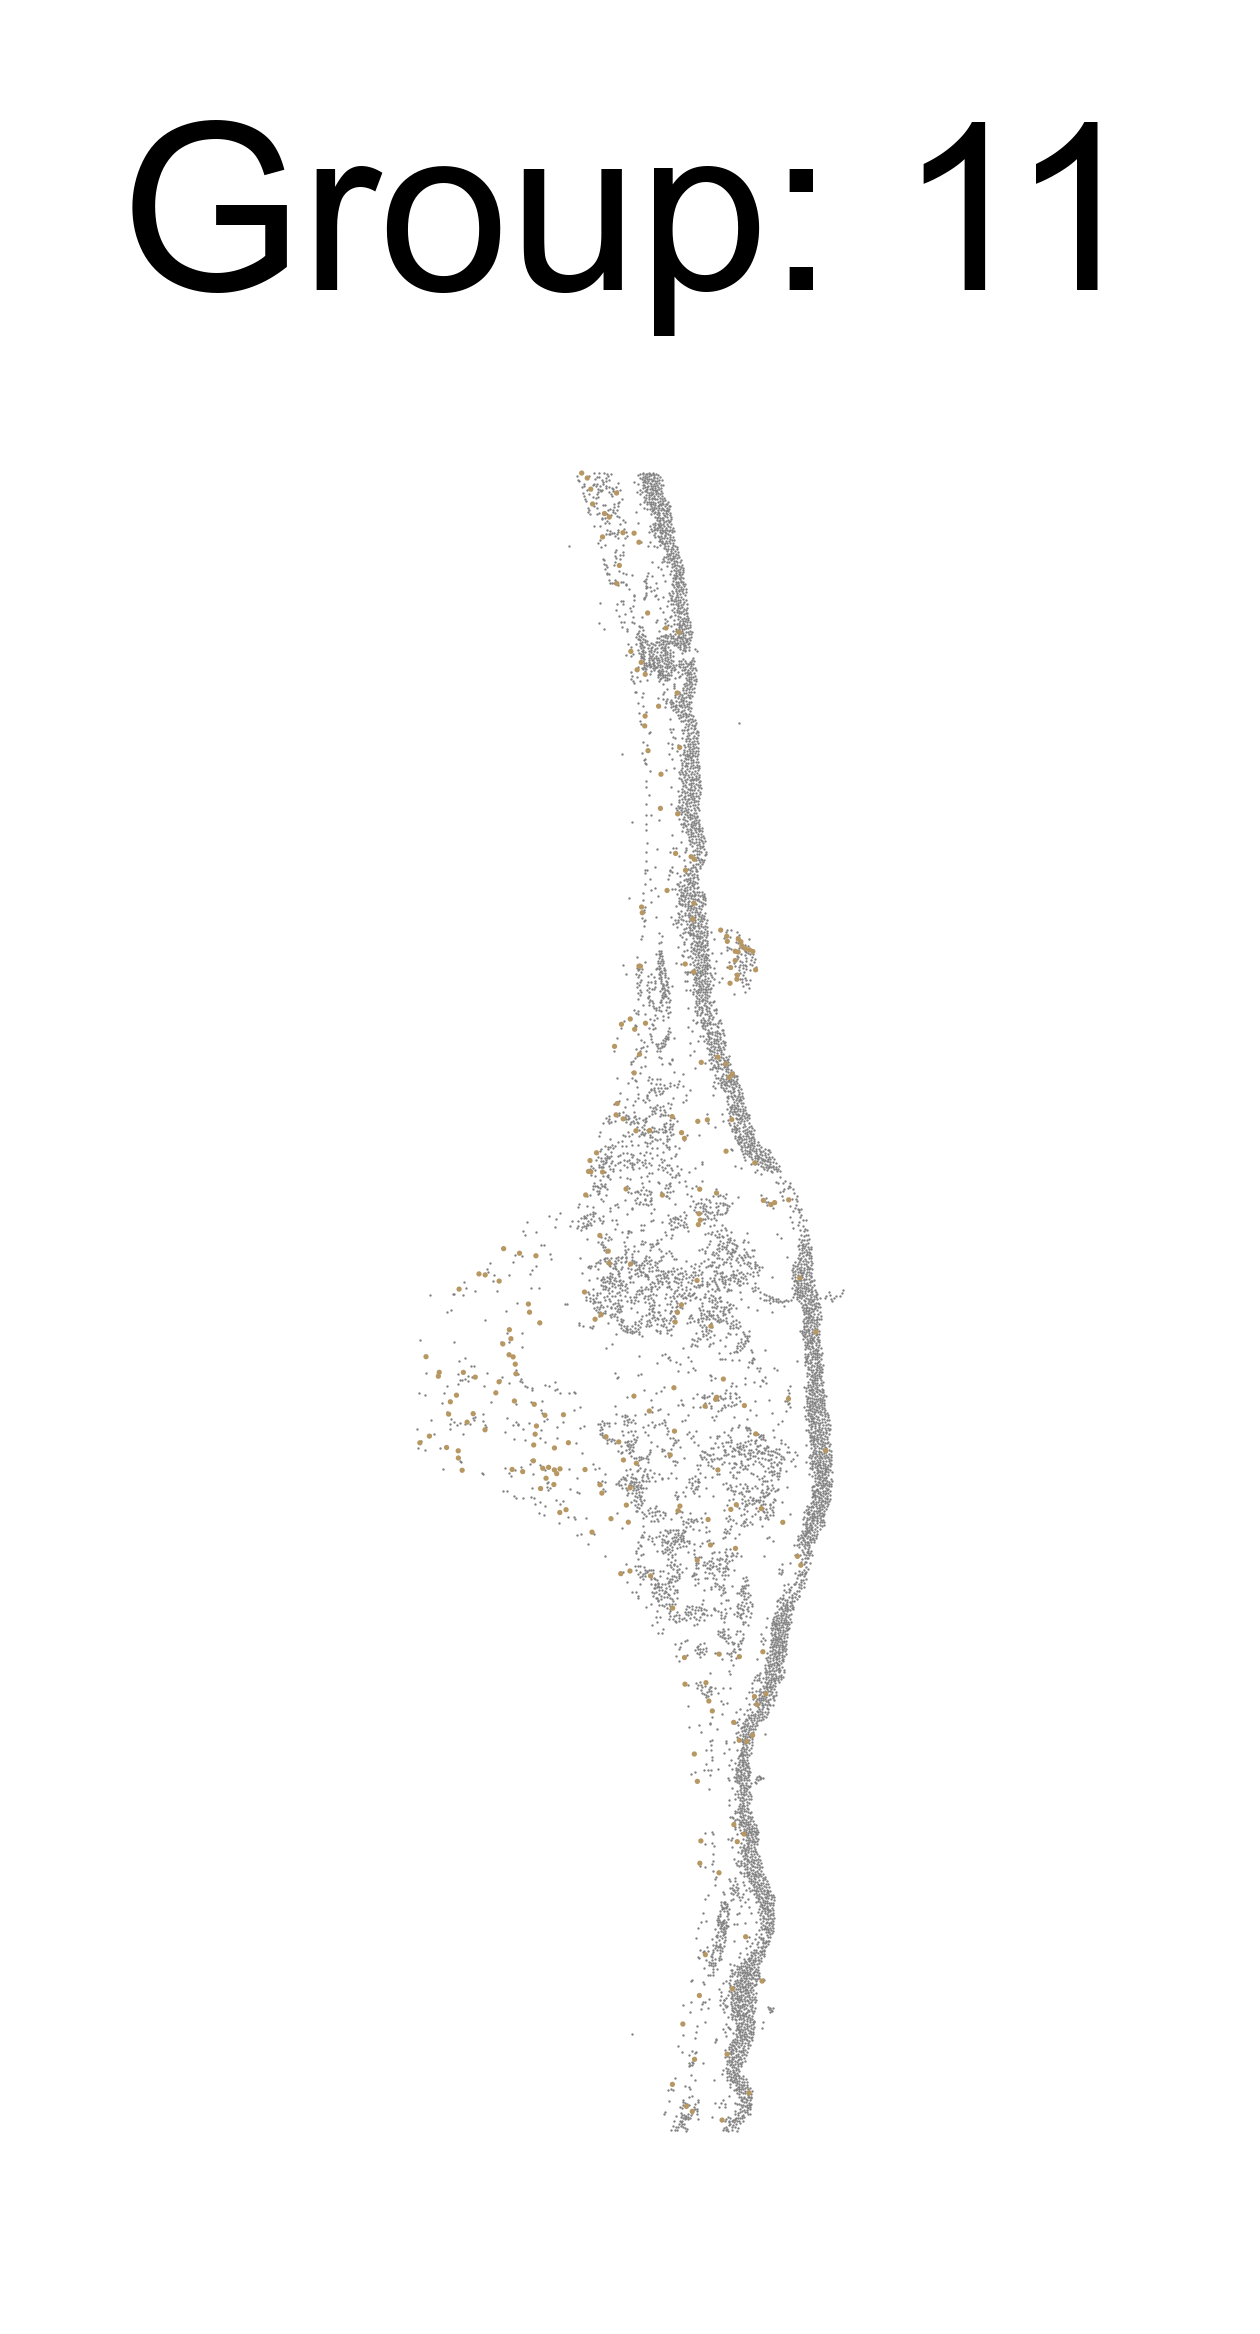

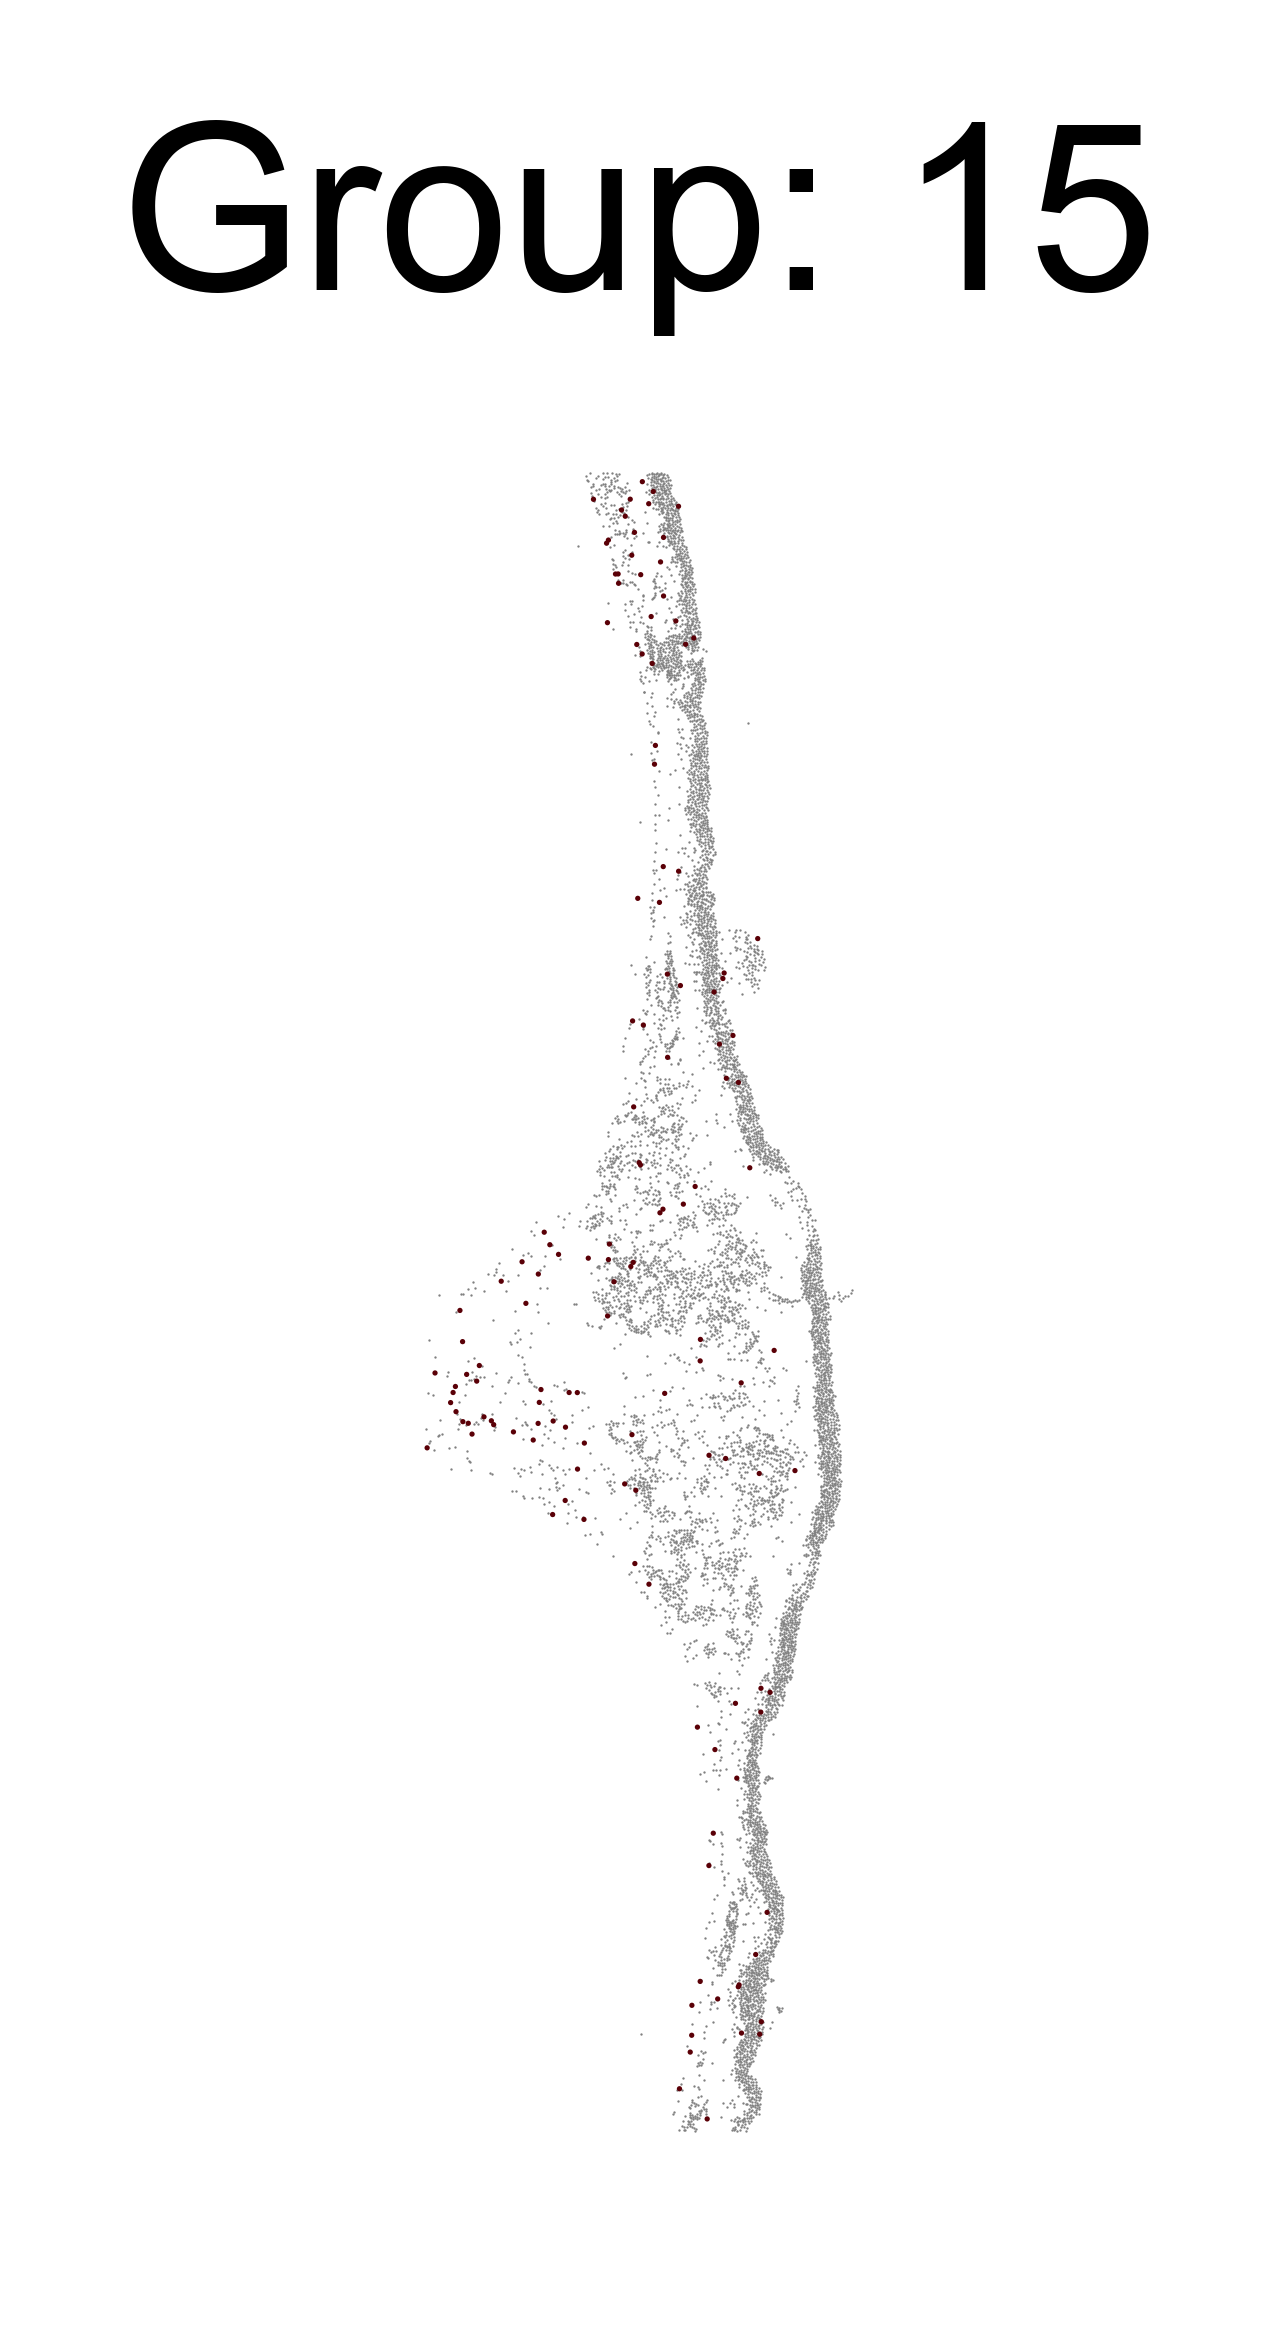

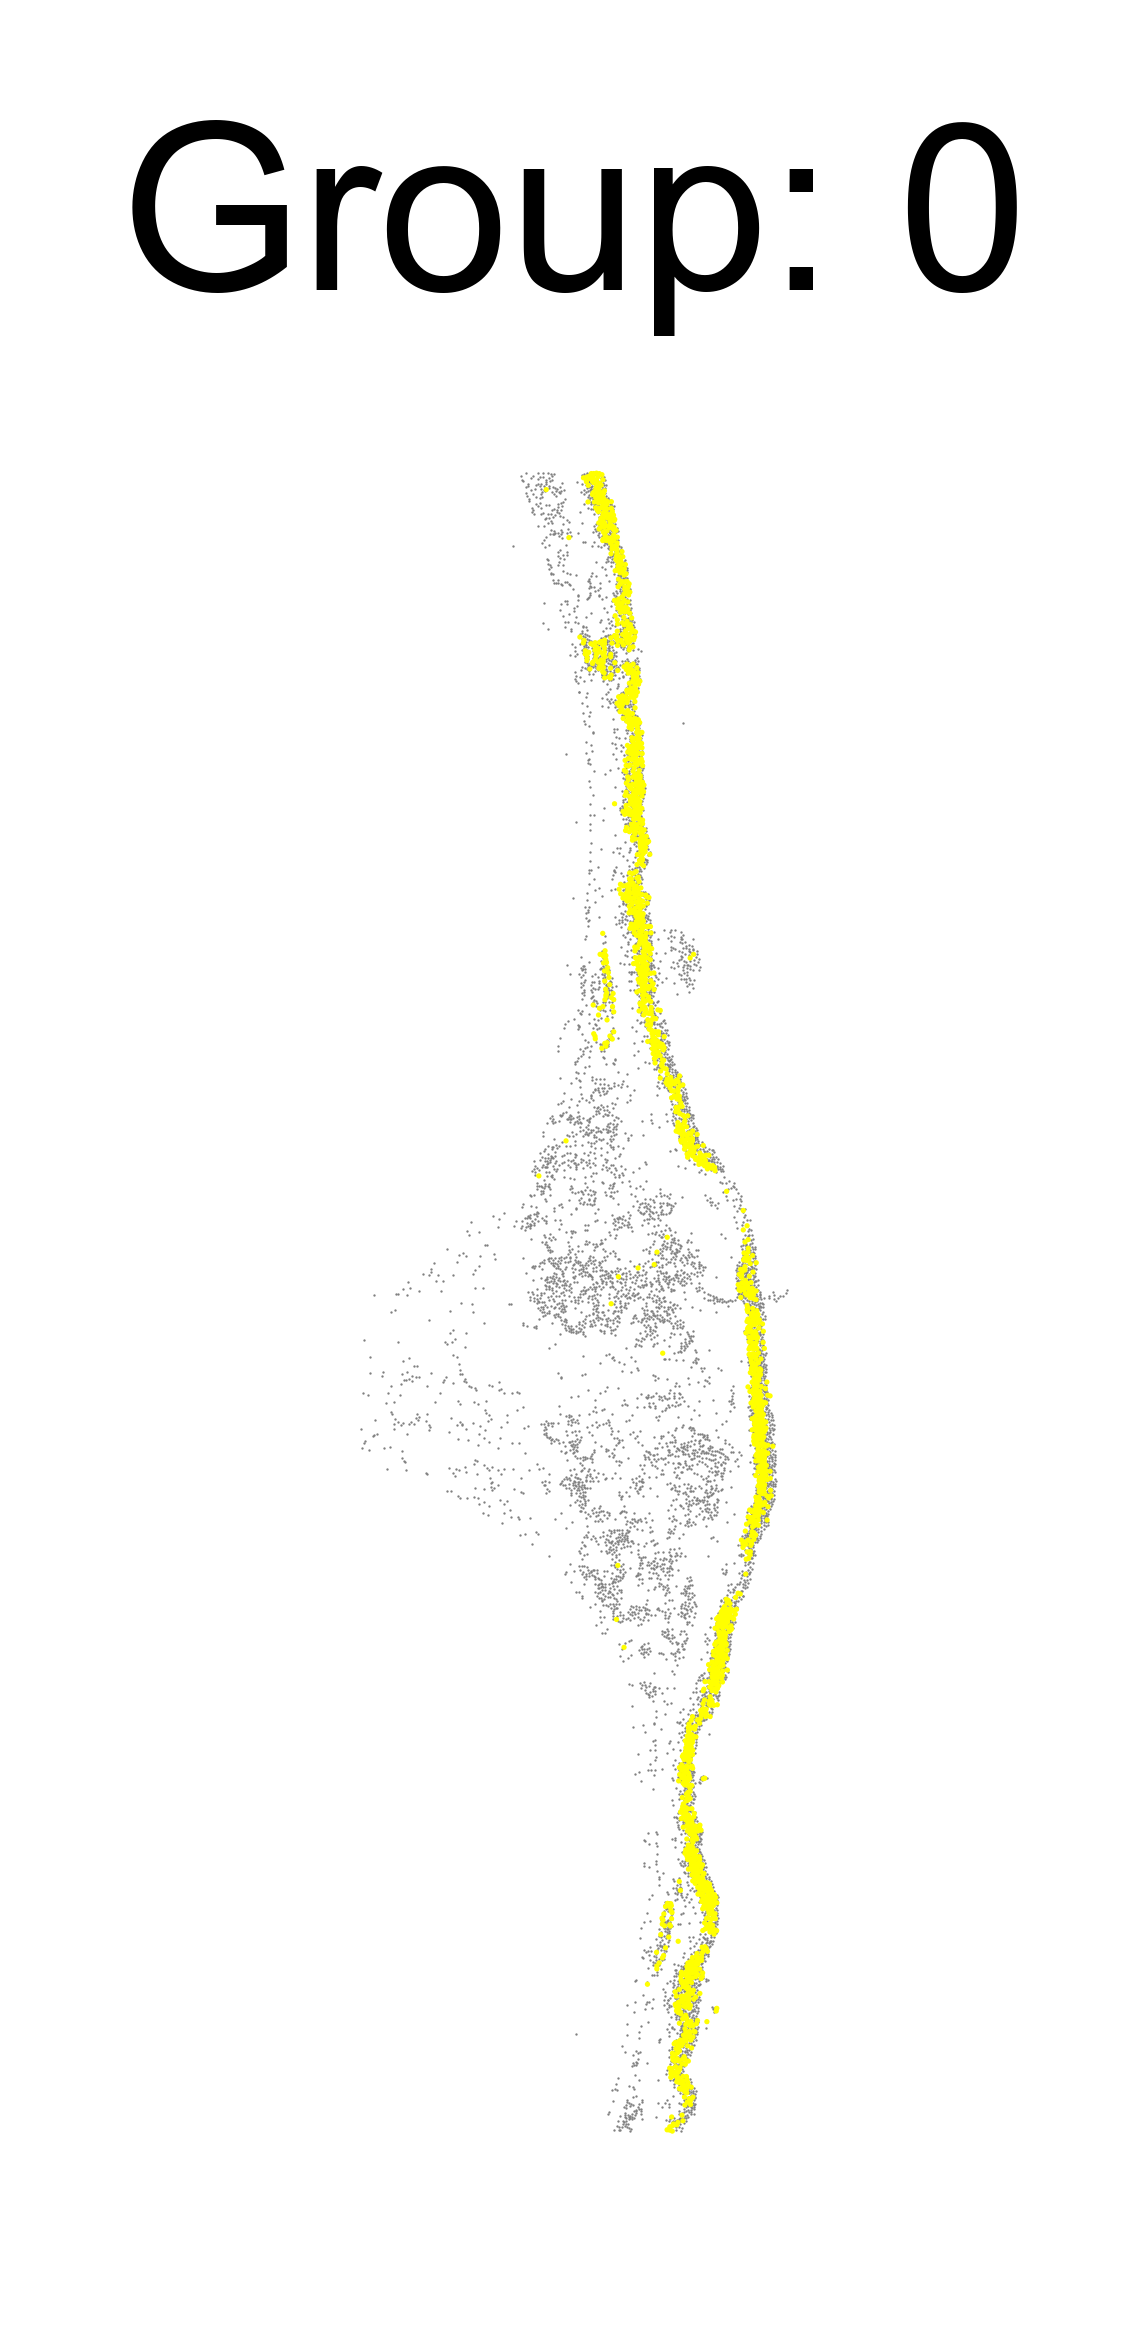

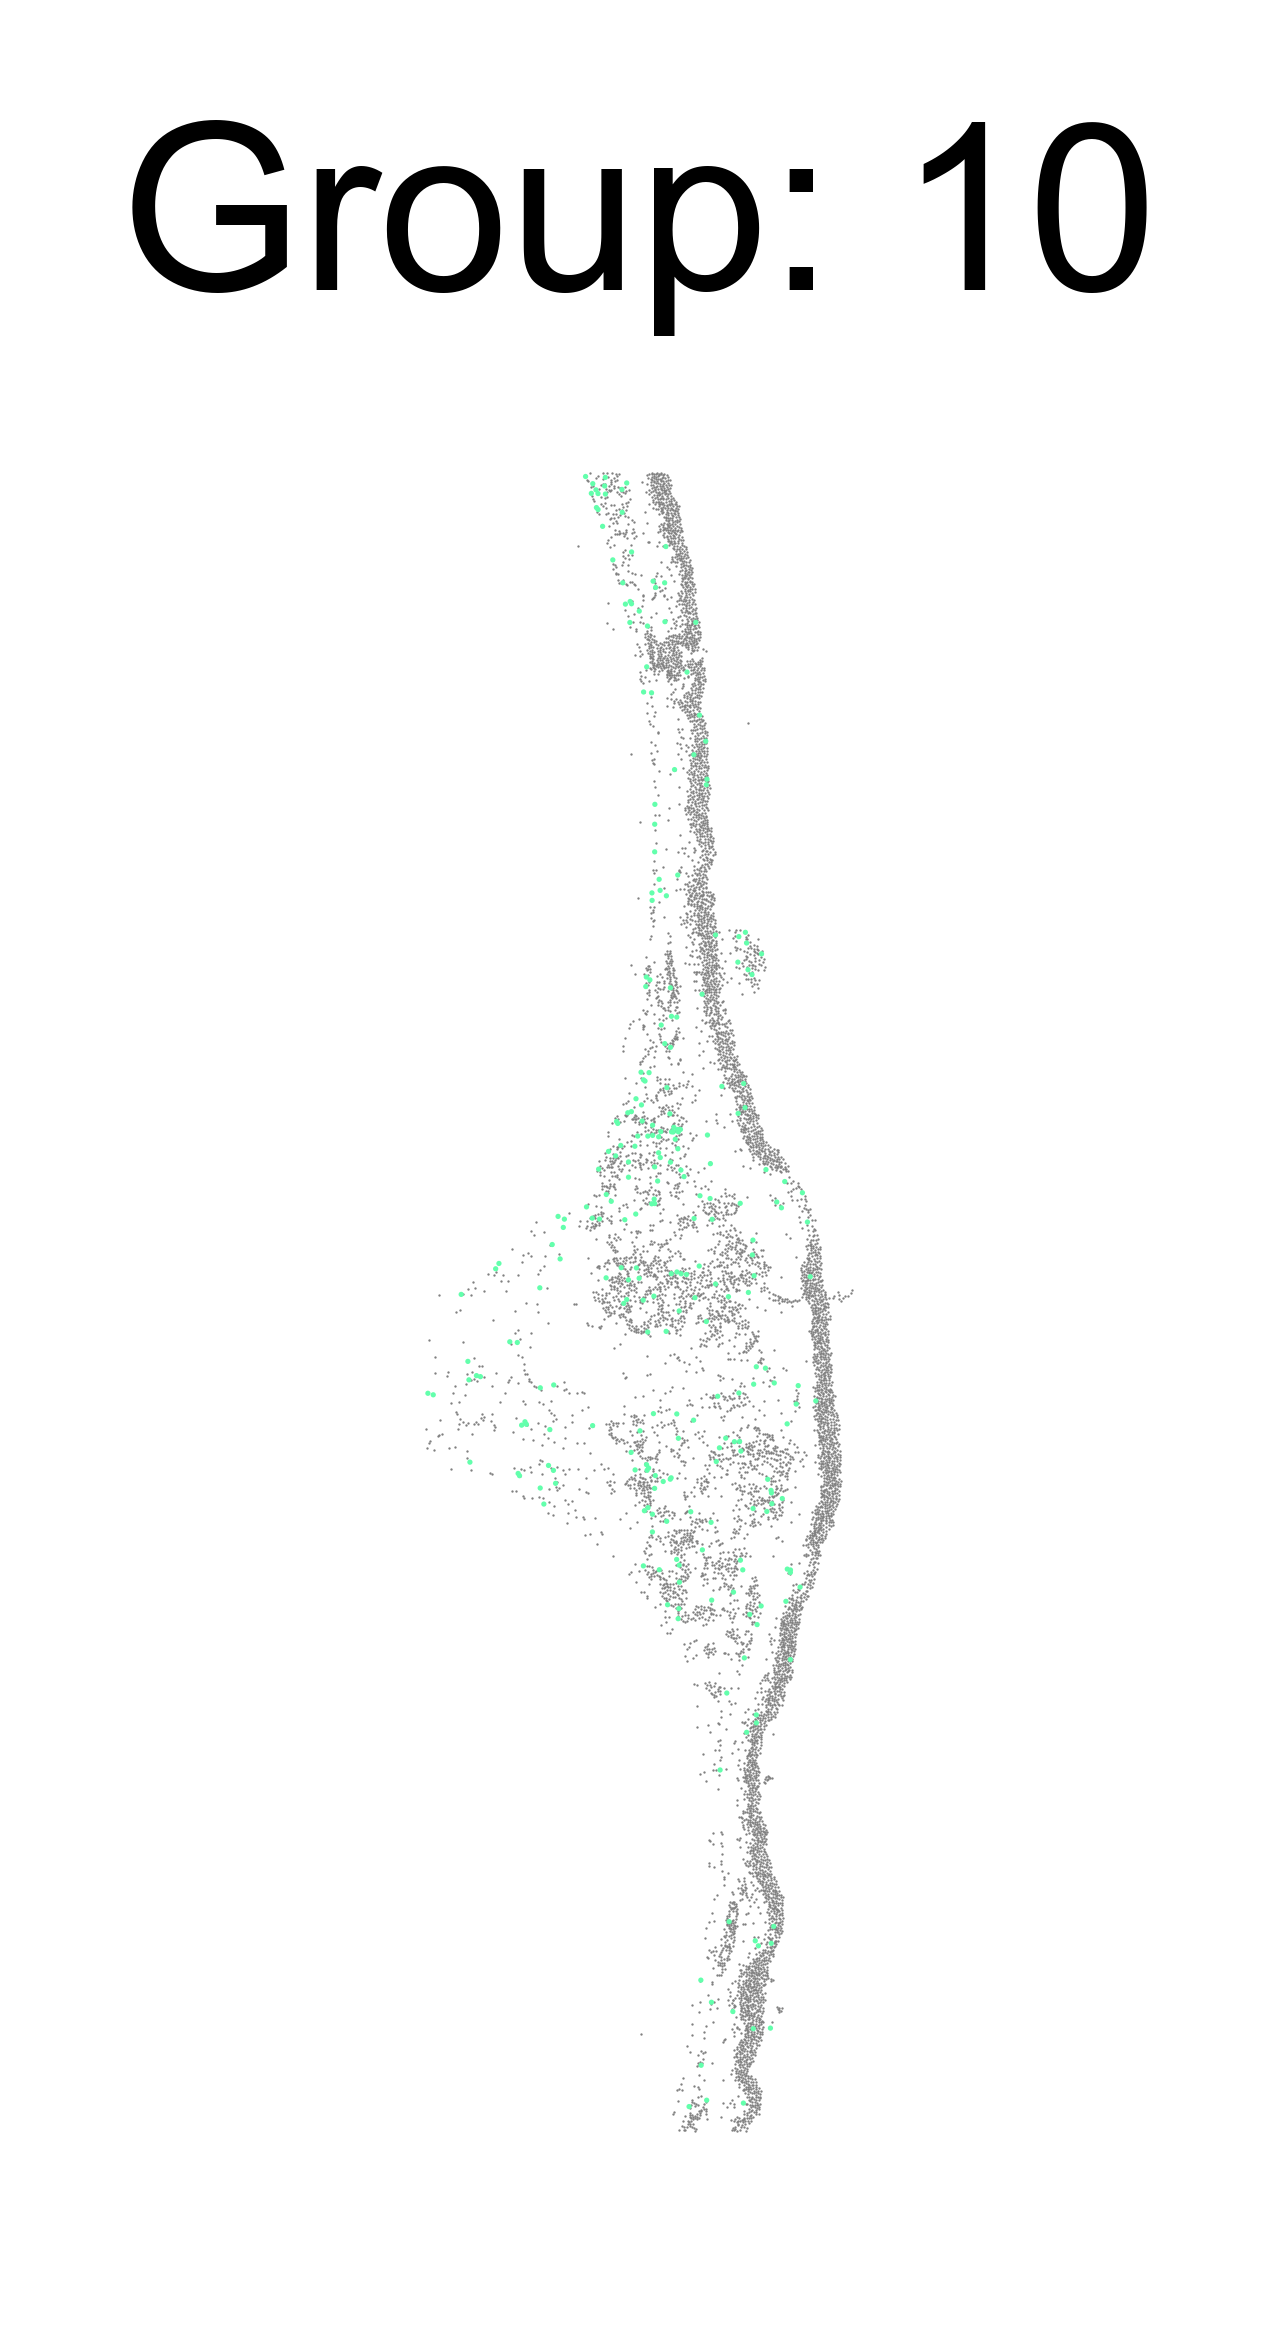

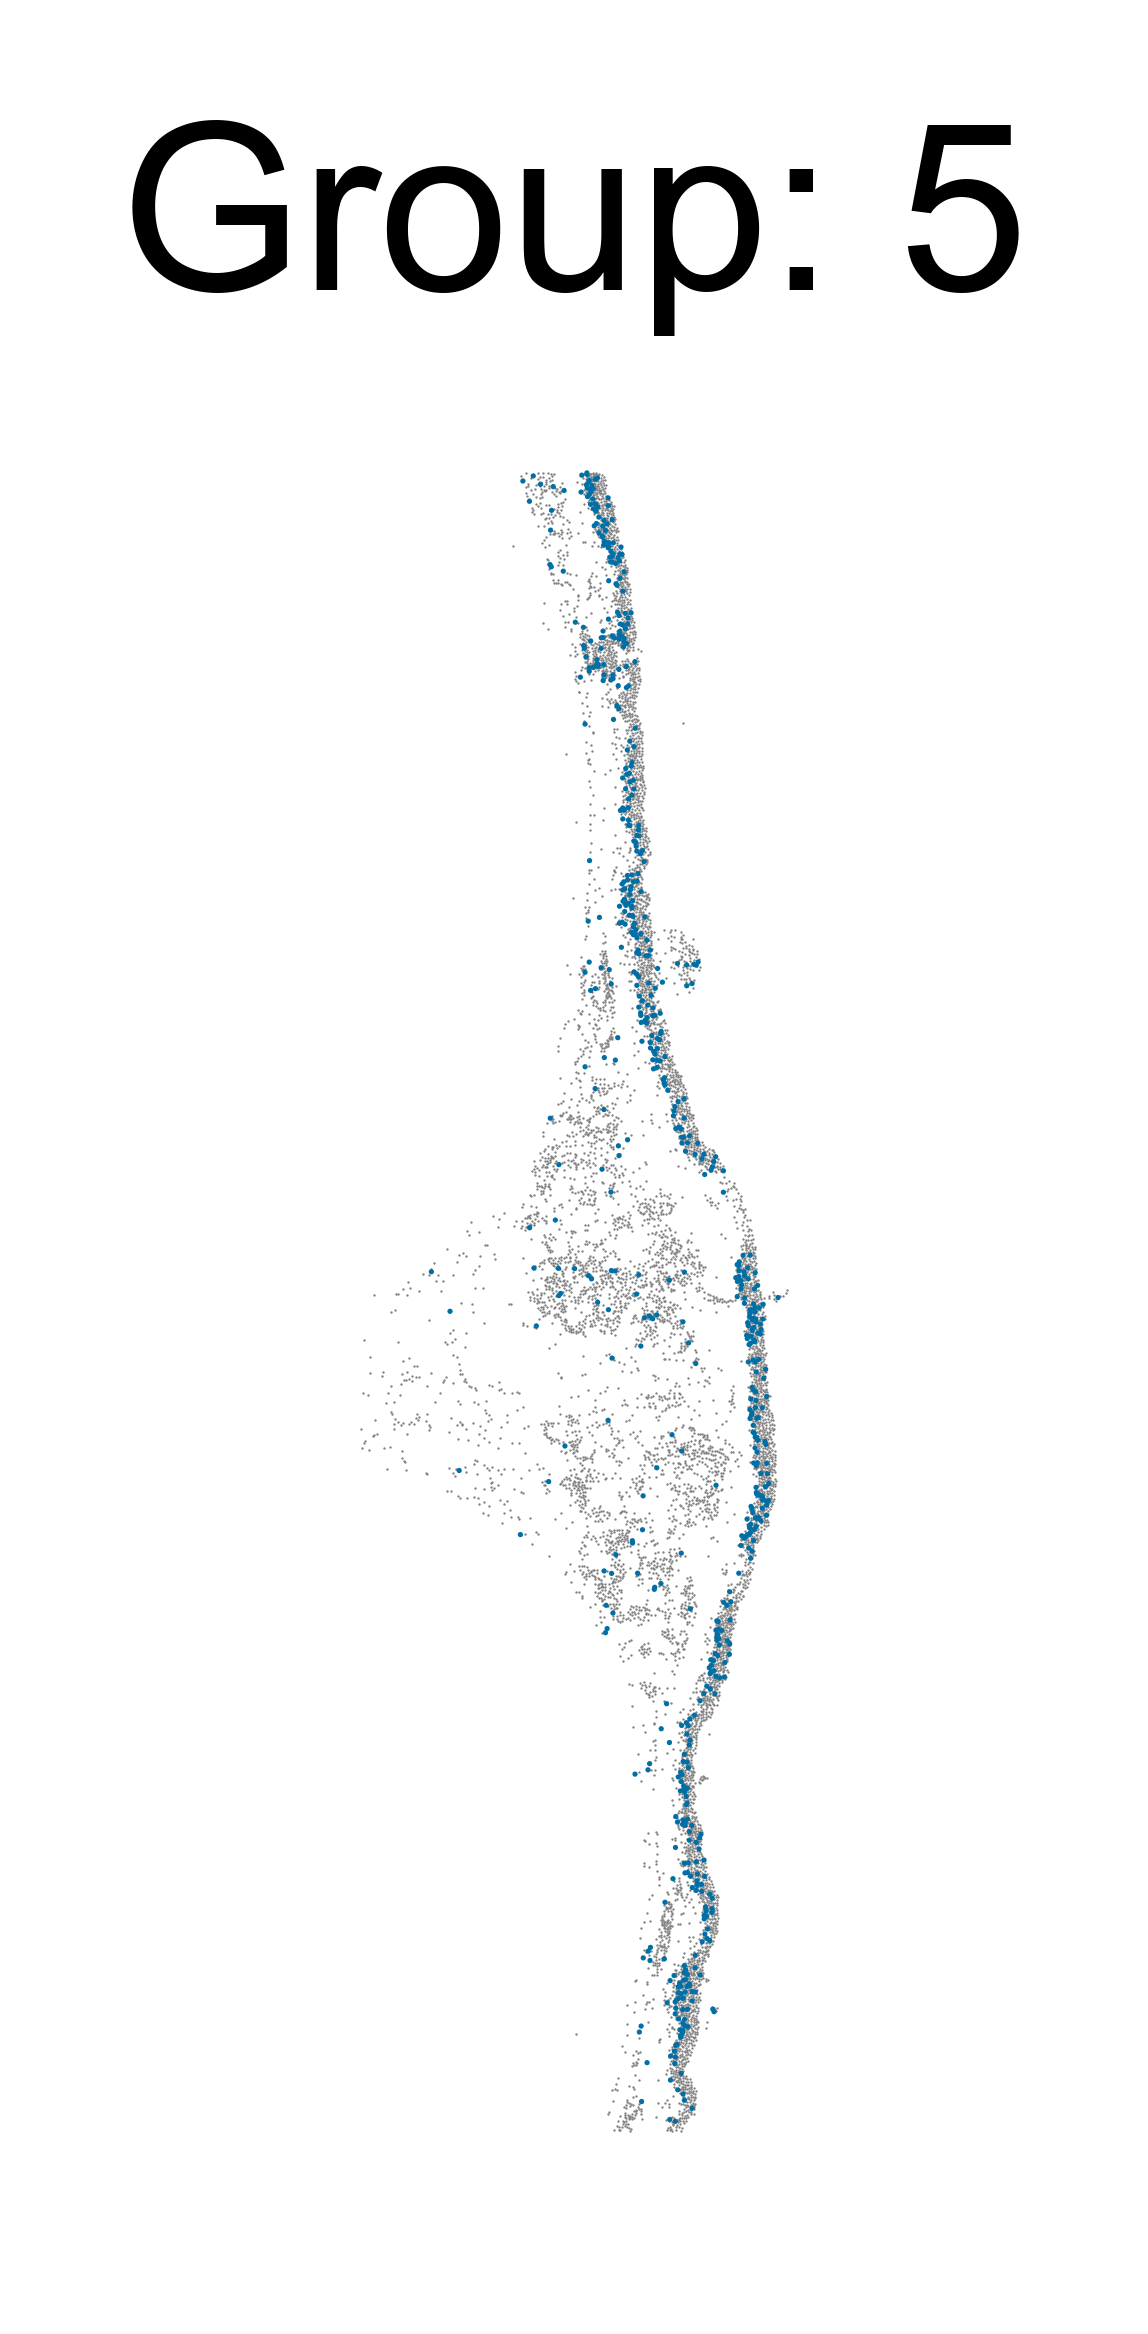

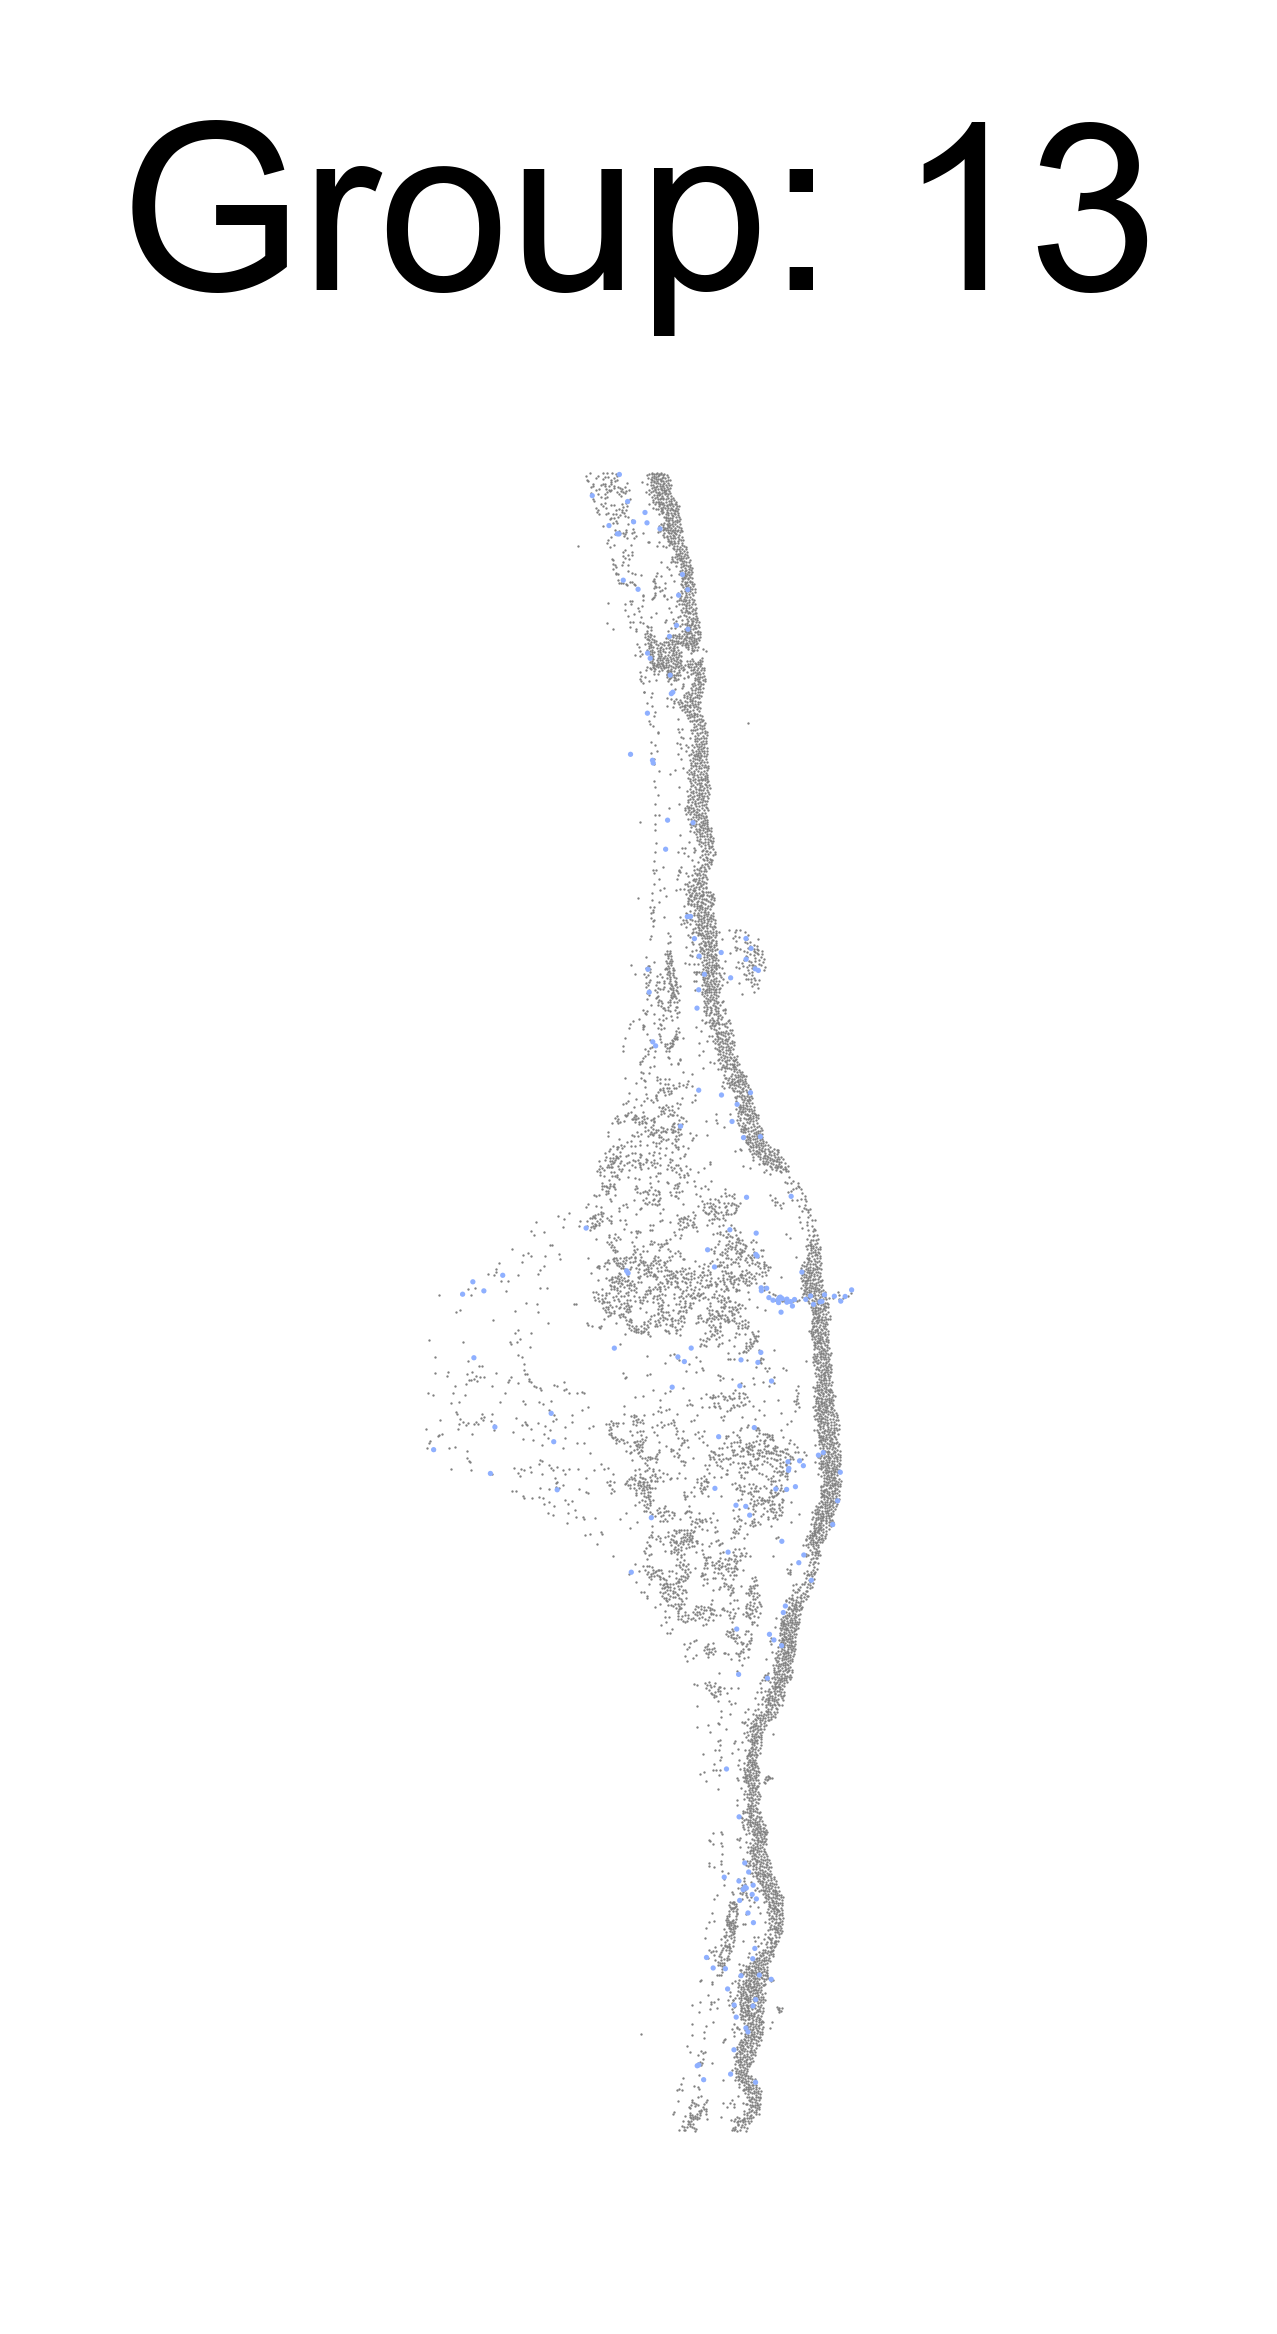

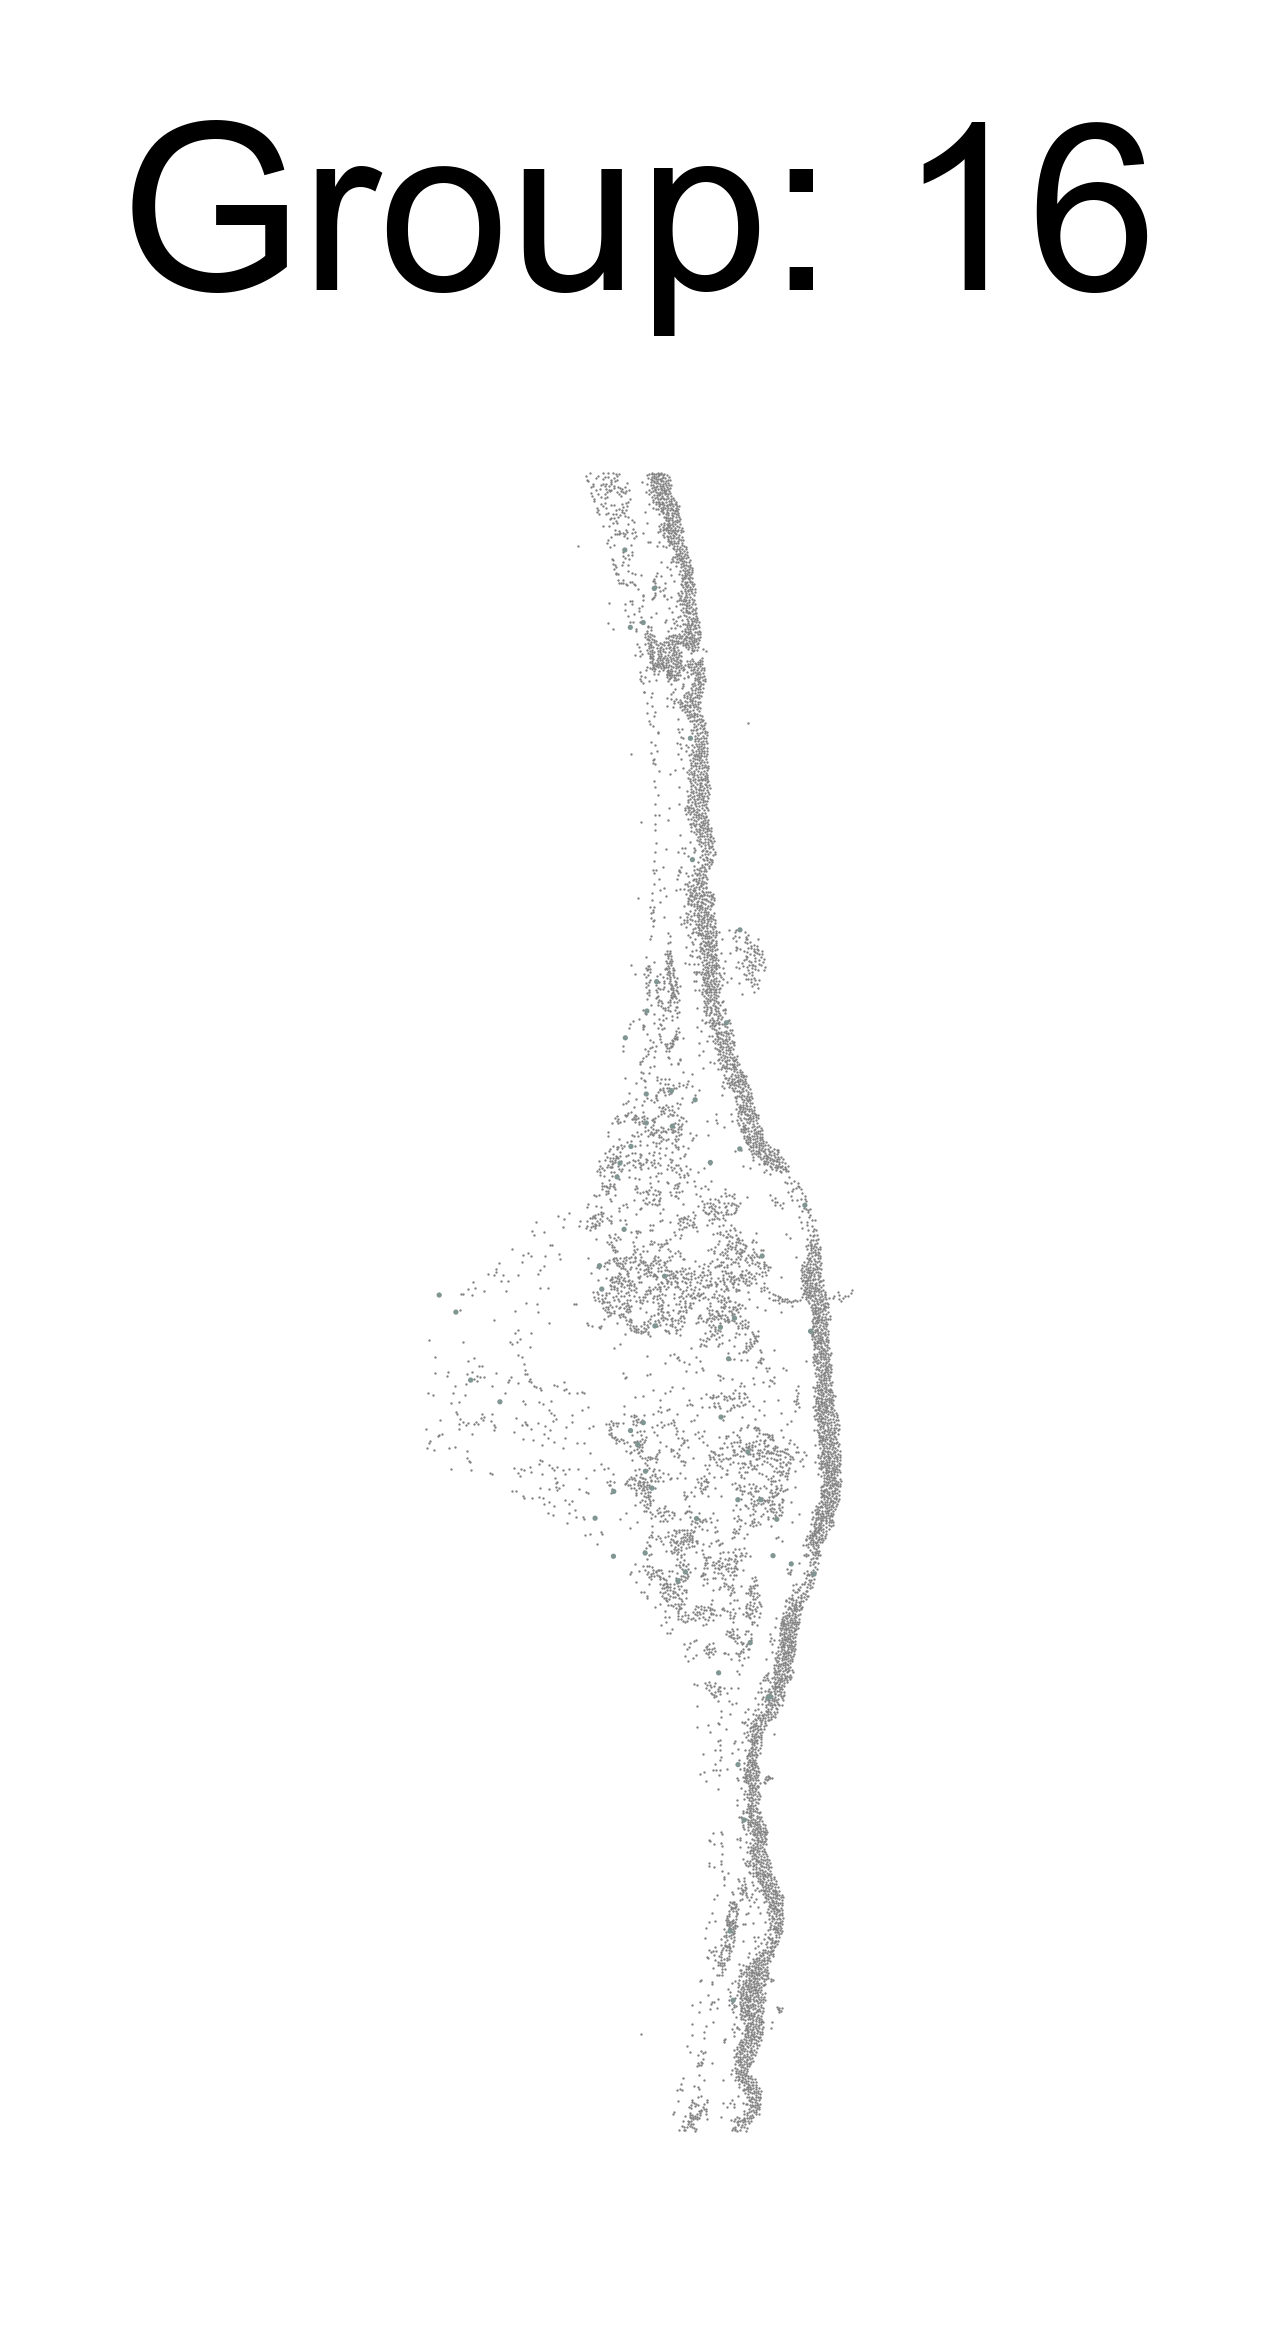

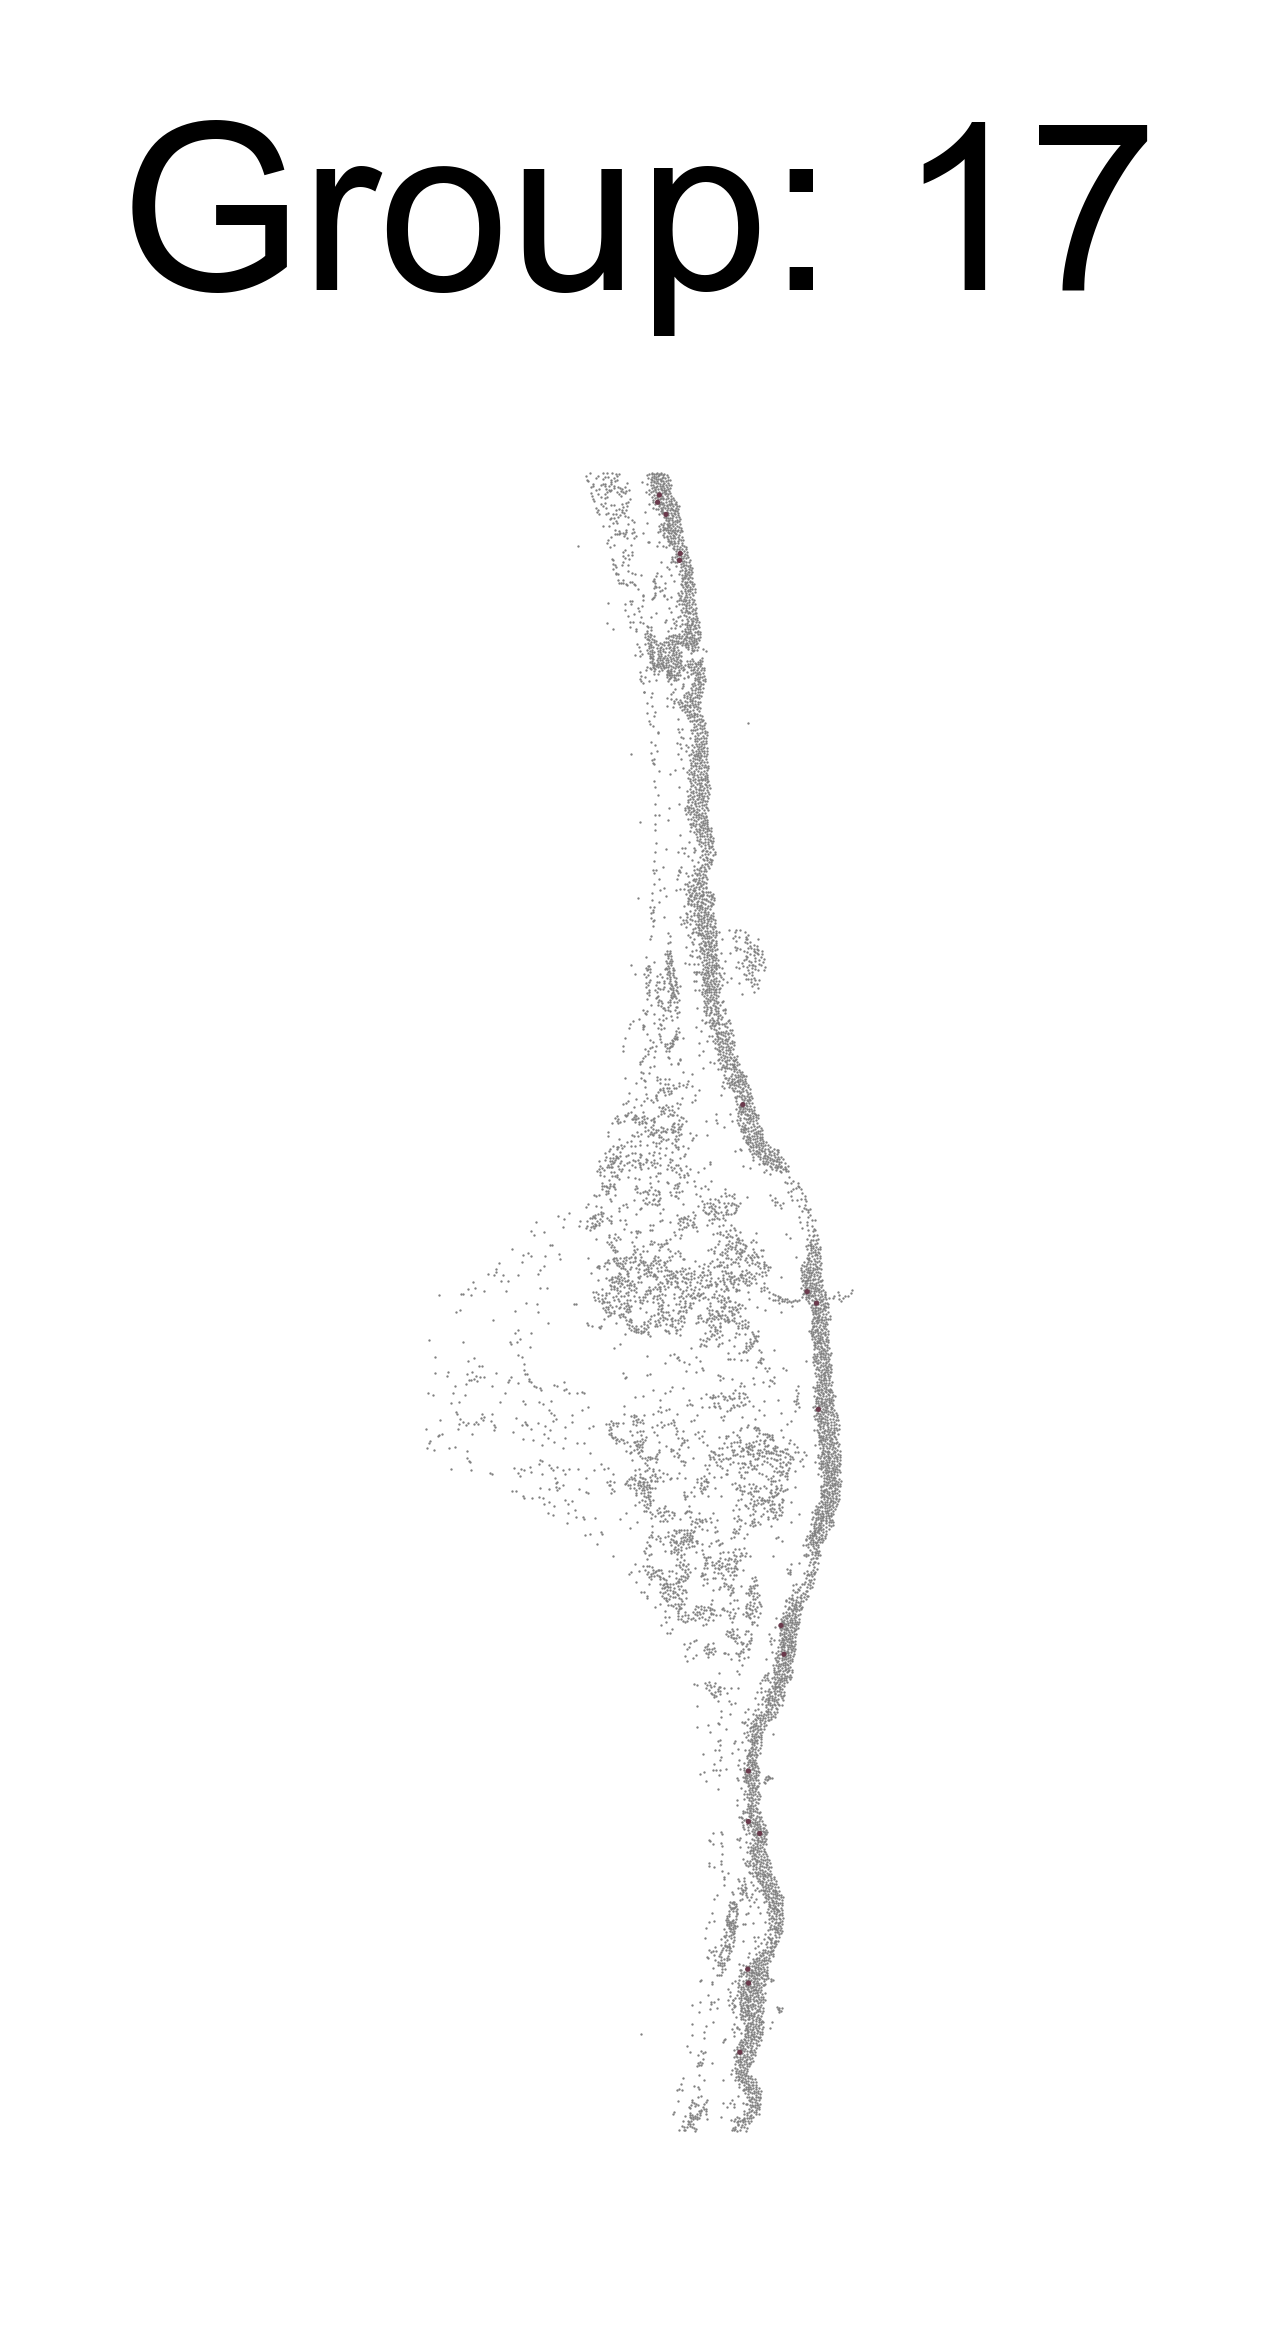

In [81]:
map_of_clusters(adata,figuresize=(0.5,2),size=0.1,clusters='individual')